# Module 3 Final Project:

## Northwind Database Statistical Tests

### Student: 

Matthew Onstott

### Dataset:

The Northwind database (a free, open-source dataset created by Microsoft) that contains data from a fictional company.

### Goal: 

To test the ability to gather information from a real-world database and use knowledge  of statistical analysis and hypothesis testing to generate analytical insights that can be of value to the company.

### Summary of Findings:

1. Does discount amount have a statistically significant effect on the quantity of a product in an order? **Yes.** <br>
   If so, at what level(s) of discount? **5%, 10%, 15%, 20%, 25% (increase).**
    
2. Does discount amount have a statistically significant effect on the total revenue in an order? **Yes.** <br>
   If so, at what level(s) of discount? **5% (increase).**
    
3. Does product category have a statistically significant effect on the total revenue in an order? **Yes.** <br>
   If so, for what product categories? **Meat/Poultry, Produce (increase); Condiments, Confections, Grains/Cereals, Seafood (decrease).**
      
4. Does ship region have a statistically significant effect on the total revenue in an order? **Yes.** <br>
   If so, for what ship regions? **Western Europe (increase); Central America, Eastern Europe, Scandinavia, Southern Europe (decrease).**

5. Does reorder level have a statistically significant effect on the cost of items in stock? **No**.


### Table of Contents:

- [1. Connect to Database](#1.-Connect-to-the-database)
- [2. Explore Tables](#2.-Explore-the-tables)
- [3. Engineer Features](#3.-Engineer-features-related-to-cost)
- [4. Statistical Tests](#4.-Conduct-statistical-tests) 
    - [4.1a Question 1 - Part 1](#4.1-Question-1a:)
    - [4.1b Question 1 - Part 2](#4.1-Question-1b:)
    - [4.2 Question 2](#4.2-Question-2:)
    - [4.3 Question 3](#4.3-Question-3:)
    - [4.4 Question 4](#4.4-Question-4:)
    - [4.5 Question 5](#4.5-Question-5:)
- [5. Recommendations](#5.-Ending-Remarks:)

## Solution:

To begin, let's review the Entity-Relationship Diagram (ERD) of the Northwind database containing the data we will be using.

<img src="Northwind_ERD_updated.png">

Now let's import the libraries and packages we will be using in this solution.

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
from math import sqrt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from statsmodels.stats.power import TTestIndPower as TTP
from statsmodels.stats.multicomp import pairwise_tukeyhsd


### 1. Connect to the database
The first phase of the OSEMN framekwork is to obtain the data. Let's open a connection to the sqlite database.

In [70]:
# establish a connection with the database
connection = sqlite3.connect("Northwind_small.sqlite")
cursor = connection.cursor()

The ERD provides a list of tables in the database. Let's check its accuracy.

In [71]:
# list table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

The number of tables and their names match the ERD above. 

Let's take a look at the data within the columns of each table to become better acquainted with the dataset. We'll combine the second and third phases of the OSEMN process. By exploring our tables and thier fields, we'll determine if any scrubbing is necessary.

[ToC](#Table-of-Contents:)

### 2. Explore the tables

#### 2.1 Employee table (1 of 13)

In [72]:
# employee table (1 of 13)
employee_df = pd.read_sql_query("SELECT * FROM Employee;", connection)
print(employee_df.info())
print('\nSample rows:')
display(employee_df.head(3))
print('Number of unique employees:', len(employee_df.Id.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          8 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB
None

Sample rows:


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp


Number of unique employees: 9


#### 2.2 Category table (2 of 13)

In [73]:
# category table (2 of 13)
category_df = pd.read_sql_query("SELECT * FROM Category;", connection)
print(category_df.info())
print('\nSample rows:')
display(category_df.head(8))
print('Number of unique categories:', len(category_df.CategoryName.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Id              8 non-null int64
CategoryName    8 non-null object
Description     8 non-null object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes
None

Sample rows:


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


Number of unique categories: 8


#### 2.3 Customer table (3 of 13)

In [74]:
# customer table (3 of 13)
customer_df = pd.read_sql_query("SELECT * FROM Customer;", connection)
print(customer_df.info())
print('\nSample rows:')
display(customer_df.head(3))
print('Number of unique')
print('-'*20)
print('customers:', len(customer_df.CompanyName.unique()))
print('contact titles:', len(customer_df.ContactTitle.unique()))
print('cities:', len(customer_df.City.unique()))
print('regions:', len(customer_df.Region.unique()))
print('postal codes:', len(customer_df.PostalCode.unique()))
print('countries:', len(customer_df.Country.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      90 non-null object
Country         91 non-null object
Phone           91 non-null object
Fax             69 non-null object
dtypes: object(11)
memory usage: 7.9+ KB
None

Sample rows:


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None


Number of unique
--------------------
customers: 91
contact titles: 12
cities: 69
regions: 9
postal codes: 87
countries: 21


#### 2.4 Shipper table (4 of 13)

In [75]:
# shipper table (4 of 13)
shipper_df = pd.read_sql_query("SELECT * FROM Shipper;", connection)
print(shipper_df.info())
print('\nSample rows:')
display(shipper_df.head())
print('Number of unique shippers:', len(shipper_df.CompanyName.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Id             3 non-null int64
CompanyName    3 non-null object
Phone          3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes
None

Sample rows:


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


Number of unique shippers: 3


#### 2.5 Supplier table (5 of 13)

In [76]:
# supplier table (5 of 13)
supplier_df = pd.read_sql_query("SELECT * FROM Supplier;", connection)
print(supplier_df.info())
print('\nSample rows:')
display(supplier_df.head(3))
print('Number of unique')
print('-'*20)
print('suppliers:', len(supplier_df.CompanyName.unique()))
print('contact titles:', len(supplier_df.ContactTitle.unique()))
print('cities:', len(supplier_df.City.unique()))
print('regions:', len(supplier_df.Region.unique()))
print('postal codes:', len(supplier_df.PostalCode.unique()))
print('countries:', len(supplier_df.Country.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
Id              29 non-null int64
CompanyName     29 non-null object
ContactName     29 non-null object
ContactTitle    29 non-null object
Address         29 non-null object
City            29 non-null object
Region          29 non-null object
PostalCode      29 non-null object
Country         29 non-null object
Phone           29 non-null object
Fax             13 non-null object
HomePage        5 non-null object
dtypes: int64(1), object(11)
memory usage: 2.8+ KB
None

Sample rows:


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None


Number of unique
--------------------
suppliers: 29
contact titles: 15
cities: 29
regions: 11
postal codes: 29
countries: 16


#### 2.6 Order table (6 of 13)

In [77]:
# order table (6 of 13)
order_df = pd.read_sql_query("SELECT * FROM `Order`;", connection)
print(order_df.info())
print('\nSample rows:')
display(order_df.head(3))
print('Descriptive statistics:')
display(order_df.describe()[['Freight']])
print('Sum of freight:', order_df.Freight.sum())
print('')
print('Number of unique')
print('-'*20)
print('customers that order:', len(order_df.CustomerId.unique()))
print('employees filling orders:', len(order_df.EmployeeId.unique()))
print('order dates:', len(order_df.OrderDate.unique()))
print('required dates:', len(order_df.RequiredDate.unique()))
print('shipped dates:', len(order_df.ShippedDate.unique()))
print('ship via:', len(order_df.ShipVia.unique()))
print('freight values:', len(order_df.Freight.unique()))
print('ship names:', len(order_df.ShipName.unique()))
print('cities:', len(order_df.ShipCity.unique()))
print('ship regions:', len(order_df.ShipRegion.unique()))
print('ship postal codes:', len(order_df.ShipPostalCode.unique()))
print('ship countries:', len(order_df.ShipCountry.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
None

Sample rows:


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil


Descriptive statistics:


,Freight
count,830.000000
mean,78.244205
std,116.779294
min,0.020000
25%,13.380000
50%,41.360000
75%,91.430000
max,1007.640000


Sum of freight: 64942.689999999995

Number of unique
--------------------
customers that order: 89
employees filling orders: 9
order dates: 480
required dates: 454
shipped dates: 388
ship via: 3
freight values: 799
ship names: 90
cities: 70
ship regions: 9
ship postal codes: 85
ship countries: 21


#### 2.7 Product table (7 of 13)

In [78]:
# product table (7 of 13)
product_df = pd.read_sql_query("SELECT * FROM Product;", connection)
print(product_df.info())
print('\nSample rows:')
display(product_df.head(3))
print('Descriptive statistics:')
display(product_df.describe()[['UnitPrice','UnitsInStock','UnitsOnOrder','ReorderLevel']])
print('Sum of')
print('-'*20)
print('unit price:', product_df.UnitPrice.sum())
print('units in stock:', product_df.UnitsInStock.sum())
print('units on order:', product_df.UnitsOnOrder.sum())
print('reorder levels:', product_df.ReorderLevel.sum())
print('')
print('Number of unique')
print('-'*20)
print('product names:', len(product_df.ProductName.unique()))
print('suppliers:', len(product_df.SupplierId.unique()))
print('categories:', len(product_df.CategoryId.unique()))
print('quantity per unit:', len(product_df.QuantityPerUnit.unique()))
print('unit prices:', len(product_df.UnitPrice.unique()))
print('units in stock:', len(product_df.UnitsInStock.unique()))
print('units on order:', len(product_df.UnitsOnOrder.unique()))
print('reorder levels:', len(product_df.ReorderLevel.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB
None

Sample rows:


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0


Descriptive statistics:


,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel
count,77.000000,77.000000,77.000000,77.000000
mean,28.866364,40.506494,10.129870,12.467532
std,33.815111,36.147222,23.141072,10.931105
min,2.500000,0.000000,0.000000,0.000000
25%,13.250000,15.000000,0.000000,0.000000
50%,19.500000,26.000000,0.000000,10.000000
75%,33.250000,61.000000,0.000000,25.000000
max,263.500000,125.000000,100.000000,30.000000


Sum of
--------------------
unit price: 2222.71
units in stock: 3119
units on order: 780
reorder levels: 960

Number of unique
--------------------
product names: 77
suppliers: 29
categories: 8
quantity per unit: 70
unit prices: 62
units in stock: 51
units on order: 10
reorder levels: 7


#### 2.8 Order Detail table (8 of 13)

In [79]:
# orderdetail table (8 of 13)
orderdetail_df = pd.read_sql_query("SELECT * FROM OrderDetail;", connection)
print(orderdetail_df.info())
print('\nSample rows:')
display(orderdetail_df.head(3))
print('Descriptive statistics:')
display(orderdetail_df.describe()[['UnitPrice','Quantity','Discount']])
print('Sum of')
print('-'*20)
print('unit price:', orderdetail_df.UnitPrice.sum())
print('quantity:', orderdetail_df.Quantity.sum())
print('')
print('Number of unique')
print('-'*20)
print('order id:', len(orderdetail_df.OrderId.unique()))
print('unit price:', len(orderdetail_df.UnitPrice.unique()))
print('unique quantity:', len(orderdetail_df.Quantity.unique()))
print('unique discount:', len(orderdetail_df.Discount.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB
None

Sample rows:


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0


Descriptive statistics:


,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000
mean,26.218520,23.812993,0.056167
std,29.827418,19.022047,0.083450
min,2.000000,1.000000,0.000000
25%,12.000000,10.000000,0.000000
50%,18.400000,20.000000,0.000000
75%,32.000000,30.000000,0.100000
max,263.500000,130.000000,0.250000


Sum of
--------------------
unit price: 56500.91
quantity: 51317

Number of unique
--------------------
order id: 830
unit price: 116
unique quantity: 55
unique discount: 11


#### 2.9 Customer Demo table (9 of 13)

In [80]:
# customercustomerdemo table (9 of 13)
customercustomerdemo_df = pd.read_sql_query("SELECT * FROM CustomerCustomerDemo;", connection)
print(customercustomerdemo_df.info())
print('\nSample rows:')
customercustomerdemo_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id                0 non-null object
CustomerTypeId    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None

Sample rows:


,Id,CustomerTypeId


#### 2.10 Customer Demographic table (10 of 13)

In [81]:
# customerdemographic table (10 of 13)
customerdemographic_df = pd.read_sql_query("SELECT * FROM CustomerDemographic;", connection)
print(customerdemographic_df.info())
print('\nSample rows:')
customerdemographic_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id              0 non-null object
CustomerDesc    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None

Sample rows:


,Id,CustomerDesc


#### 2.11 Region table (11 of 13)

In [82]:
# region table (11 of 13)
region_df = pd.read_sql_query("SELECT * FROM Region;", connection)
print(region_df.info())
print('\nSample rows:')
display(region_df.head())
print('Number of unique regions:', len(region_df.RegionDescription.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Id                   4 non-null int64
RegionDescription    4 non-null object
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes
None

Sample rows:


,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


Number of unique regions: 4


#### 2.12 Territory table (12 of 13)

In [83]:
# territory table (12 of 13)
territory_df = pd.read_sql_query("SELECT * FROM Territory;", connection)
print(territory_df.info())
print('\nSample rows:')
display(territory_df.head(3))
print('Number of unique territories:', len(territory_df.TerritoryDescription.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
Id                      53 non-null object
TerritoryDescription    53 non-null object
RegionId                53 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None

Sample rows:


,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1


Number of unique territories: 52


#### 2.13 Employee Territory table (13 of 13)

In [84]:
# employeeterritory table (13 of 13)
employeeterritory_df = pd.read_sql_query("SELECT * FROM EmployeeTerritory;", connection)
print(employeeterritory_df.info())
print('\nSample rows:')
display(employeeterritory_df.head(3))
print('Number of unique employees with territories:', len(employeeterritory_df.EmployeeId.unique()))
print('Number of unique territories with employees:', len(employeeterritory_df.TerritoryId.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Id             49 non-null object
EmployeeId     49 non-null int64
TerritoryId    49 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
None

Sample rows:


,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581


Number of unique employees with territories: 9
Number of unique territories with employees: 49


Dataset exploration has revealed a lot of interesting information and relationships between potential variables. We'll use what we've learned above within our hypothesis tests. Before we get to the statistical tests, let's perform a scrubbing activity to expand the information available in the dataset. We will engineer features to describe the costs to and revenues from  Northwind company orders.

[ToC](#Table-of-Contents:)

### 3. Engineer features related to cost

Quantity and price information is provided in the *Product* and *Order Detail* tables. Let's use this information to create new columns describing the cost of goods on hand and ordered in the *Product* table, and the revenue received from goods sold in the *Order Detail* table. 

#### 3.1 Cost features for product table fields

In [85]:
# create columns for total cost of units in stock, units on order, and reorder level
product_df['CostOfUnitsInStock'] = product_df['UnitPrice'] * product_df['UnitsInStock']
product_df['CostOfUnitsOnOrder'] = product_df['UnitPrice'] * product_df['UnitsOnOrder']
product_df['CostOfReorderLevel'] = product_df['UnitPrice'] * product_df['ReorderLevel']
print('Descriptive statistics:')
display(product_df.describe()[['CostOfUnitsInStock','CostOfUnitsOnOrder','CostOfReorderLevel']])
print('Sum of')
print('-'*20)
print('cost of units in stock:', product_df.CostOfUnitsInStock.sum())
print('cost of units on order:', product_df.CostOfUnitsOnOrder.sum())
print('cost of reorder level:', product_df.CostOfReorderLevel.sum())
print('\nNumber of unique')
print('-'*20)
print('cost of units in stock:', len(product_df.CostOfUnitsInStock.unique()))
print('cost of units on order:', len(product_df.CostOfUnitsOnOrder.unique()))
print('cost of reorder levels:', len(product_df.CostOfReorderLevel.unique()))

Descriptive statistics:


,CostOfUnitsInStock,CostOfUnitsOnOrder,CostOfReorderLevel
count,77.000000,77.000000,77.000000
mean,961.699351,186.720779,301.559740
std,1032.816544,460.441054,517.002657
min,0.000000,0.000000,0.000000
25%,258.900000,0.000000,0.000000
50%,646.000000,0.000000,180.000000
75%,1140.000000,0.000000,390.000000
max,4479.500000,2660.000000,3952.500000


Sum of
--------------------
cost of units in stock: 74050.85
cost of units on order: 14377.5
cost of reorder level: 23220.1

Number of unique
--------------------
cost of units in stock: 72
cost of units on order: 18
cost of reorder levels: 50


#### 3.2 Cost features for order table fields

In [86]:
# create total revenue and discount amount columns in the order detail table
orderdetail_df['TotalRevenue'] = orderdetail_df['Quantity'] * orderdetail_df['UnitPrice'] * (1 - orderdetail_df['Discount'])
orderdetail_df['DiscountAmount'] = orderdetail_df['Quantity'] * orderdetail_df['UnitPrice'] * orderdetail_df['Discount']
print('Descriptive statistics:')
display(orderdetail_df.describe()[['TotalRevenue','DiscountAmount']])
print('Sum of')
print('-'*20)
print('total revenue:', orderdetail_df.TotalRevenue.sum())
print('discount amounts:', orderdetail_df.DiscountAmount.sum())
print('\nNumber of unique')
print('-'*20)
print('total revenues:', len(orderdetail_df.TotalRevenue.unique()))
print('discount amounts:', len(orderdetail_df.DiscountAmount.unique()))

print('\nPotential total revenue if discounts were not applied:', orderdetail_df.TotalRevenue.sum() + orderdetail_df.DiscountAmount.sum())

Descriptive statistics:


,TotalRevenue,DiscountAmount
count,2155.000000,2155.000000
mean,587.374960,41.144107
std,969.224235,133.993817
min,4.800000,0.000000
25%,147.000000,0.000000
50%,337.750000,0.000000
75%,656.000000,30.560000
max,15810.000000,2108.000000


Sum of
--------------------
total revenue: 1265793.0395
discount amounts: 88665.5505

Number of unique
--------------------
total revenues: 1165
discount amounts: 568

Potential total revenue if discounts were not applied: 1354458.5899999999


Now that we have useful financial information, we will turn our attention to modeling answers to company questions with statistical hypothesis testing and interpreting the results.

[ToC](#Table-of-Contents:)

### 4. Conduct statistical tests

## 4.1 Question 1a: 

### Does discount amount have a statistically significant effect on the quantity of a product in an order?

### Hypothesis 1a: 

- **H0**: There is no difference in the quantity of a product in orders with discounts and orders without discounts. 
- **H1**: there is a difference in the quantity of a product in orders with discounts and orders without discounts.
- **Test Type**: Two-tailed, because we want to determine if there is or is not a difference, regardless of direction.
- **Alpha Level**: 0.05.
- **Control Group**: *Order Detail* records without discounts.
- **Treatment Group**: *Order Detail* records with discounts.
- **Statistical Test**: *Welch's unequal variances t-test*. This is a two-sample test used to test the hypothesis that two populations have equal means. It is more reliable than similar tests in situations where the two samples have unequal variances or unequal sample sizes. It should be noted that this test assumes normality in the two populations. 

To answer this question, let's first find out how many orders were made with the 11 unique discounts offered.

Context
----------------------------------------
Total number of unique orders: 830
Total records in order detail table: 2155
Total records without discounts: 1317
Total records with discounts: 838

Percentage of Discounts at Each Level
----------------------------------------


0.00    0.611137
0.05    0.085847
0.10    0.080278
0.20    0.074710
0.15    0.072854
0.25    0.071462
0.03    0.001392
0.02    0.000928
0.01    0.000464
0.04    0.000464
0.06    0.000464
Name: Discount, dtype: float64

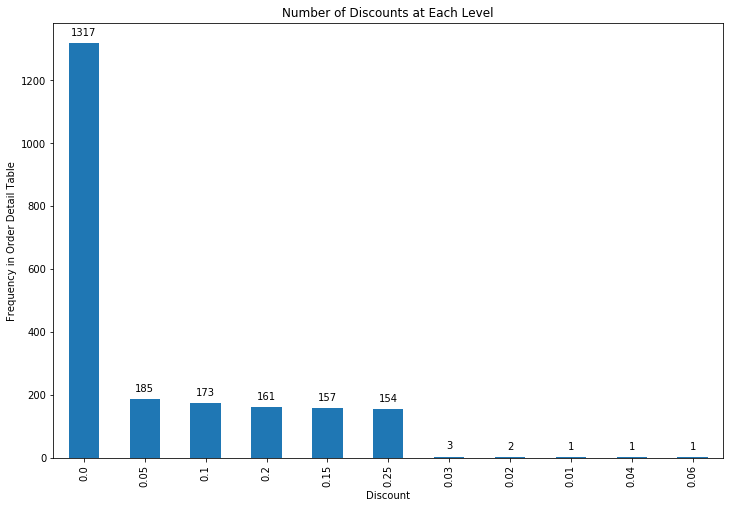

In [87]:
# discount information in order detail table
discount_series = orderdetail_df.Discount.value_counts()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
pd.value_counts(orderdetail_df.Discount).plot.bar()
plt.title('Number of Discounts at Each Level')
plt.xlabel('Discount')
plt.ylabel('Frequency in Order Detail Table')
for i, v in enumerate(orderdetail_df.Discount.value_counts()):
    ax.text(i, v+25, "%d" %v, ha="center");
print('Context')
print('-'*40)
print('Total number of unique orders:', orderdetail_df.OrderId.nunique())  
print('Total records in order detail table:', discount_series.sum())
print('Total records without discounts:', discount_series.values[0])
print('Total records with discounts:', discount_series.values[1:].sum())
print('\nPercentage of Discounts at Each Level')
print('-'*40)
orderdetail_df.Discount.value_counts(normalize=True)

61% of the 2,155 *Order Detail* rows did not have a discount applied. 39% of the *Order Detail* rows did have a discount applied. This affects 838 rows. The 2,155 *Order Detail* rows map to 830 unique orders.

Let's next get an idea of how **Discount** affects **Quantity**.

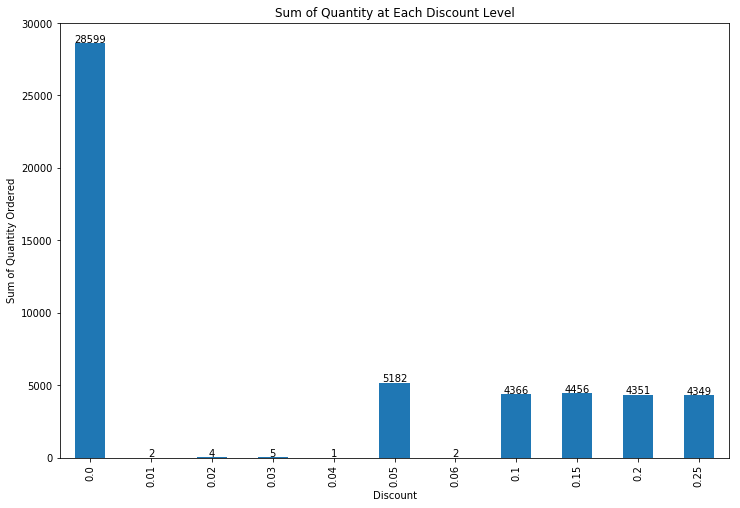

Total sum of quantity: 51317

Percentage of Quantity Sum at Each Discount Level
--------------------------------------------------
Discount
0.00    0.557301
0.01    0.000039
0.02    0.000078
0.03    0.000097
0.04    0.000019
0.05    0.100980
0.06    0.000039
0.10    0.085079
0.15    0.086833
0.20    0.084787
0.25    0.084748
Name: Quantity, dtype: float64


In [88]:
# sum of quantity ordered by discount
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
orderdetail_df.groupby('Discount').Quantity.sum().plot.bar()
plt.title('Sum of Quantity at Each Discount Level')
plt.xlabel('Discount')
plt.ylabel('Sum of Quantity Ordered')
for i, v in enumerate(orderdetail_df.groupby('Discount').Quantity.sum()):
    ax.text(i, v+40, "%d" %v, ha="center");
plt.show();

print('Total sum of quantity:', orderdetail_df.Quantity.sum())
print('\nPercentage of Quantity Sum at Each Discount Level')
print('-'*50)
print(orderdetail_df.groupby('Discount').Quantity.sum() / orderdetail_df.Quantity.sum())

Transctions without discounts account for 56% of the total sum of **Quantity** that has been ordered. The *5%* discount is the discount level with the greatest quantity ordered at 10%. The *10%*, *15%*, *20%*, and *25%* discount levels each account for about 8% of the quantity ordered.

Let's isolate the *Order Details* rows with discounts and rows without discounts so that we can investigate their distributions.

No Discounts - descriptive statistics:


,Discount,Quantity
count,1317.0,1317.000000
mean,0.0,21.715262
std,0.0,17.507493
min,0.0,1.000000
25%,0.0,10.000000
50%,0.0,18.000000
75%,0.0,30.000000
max,0.0,130.000000


Discounts - descriptive statistics:


,Discount,Quantity
count,838.000000,838.000000
mean,0.144439,27.109785
std,0.071808,20.771439
min,0.010000,1.000000
25%,0.100000,12.000000
50%,0.150000,20.000000
75%,0.200000,36.000000
max,0.250000,130.000000


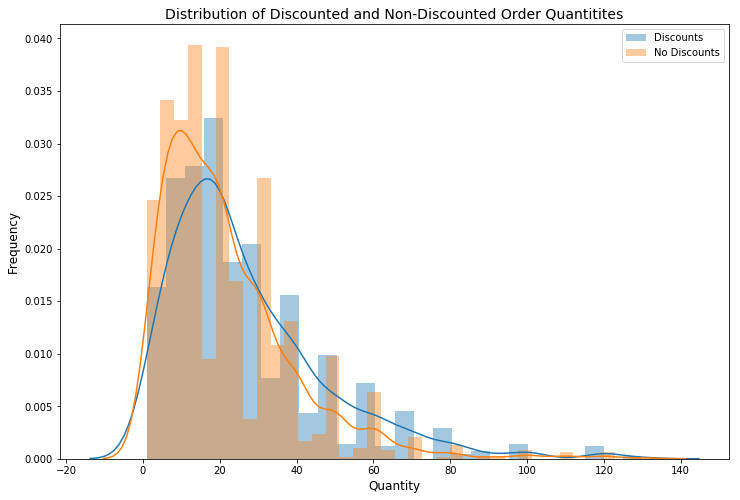

In [89]:
# separate discount and non-discount rows into separate dataframes
orderdetail_nodiscounts_df = orderdetail_df.loc[orderdetail_df.Discount == 0]
print('No Discounts - descriptive statistics:')
display(orderdetail_nodiscounts_df.describe()[['Discount', 'Quantity']])

orderdetail_discounts_df = orderdetail_df.loc[orderdetail_df['Discount'] > 0]
print('Discounts - descriptive statistics:')
display(orderdetail_discounts_df.describe()[['Discount', 'Quantity']])

# plot
f = plt.figure(figsize=(12, 8))
sns.distplot(orderdetail_discounts_df.Quantity, label='Discounts')
sns.distplot(orderdetail_nodiscounts_df.Quantity, label='No Discounts')
plt.title('Distribution of Discounted and Non-Discounted Order Quantitites', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Quantity', fontsize=12)
plt.legend()
plt.show();

Discount and non-discount quantity distributions appear very similar, visually. The kernel density estimate indicates that the discount distribution has a higher mean than less of a sharp peak than the non-discount distribution.

For **Quantity**, the non-discount mean is 21.72 and the discount mean is 27.11. The non-discount standard deviation is 17.51 and the discount standard deviation is 20.77.

Our next challenge will be to investigate whether this difference is statistically significant. First, let's determine if our groups meet the normality assumption.

In [90]:
# KS normality test
print('KS Tests')
print('-'*70)
print('[ All Discounts ]:', stats.kstest(orderdetail_discounts_df.Quantity, 'norm'), '- n =', len(orderdetail_discounts_df.Quantity))
print('[ No Discounts ]:', stats.kstest(orderdetail_nodiscounts_df.Quantity, 'norm'), '- n =', len(orderdetail_nodiscounts_df.Quantity))

KS Tests
----------------------------------------------------------------------
[ All Discounts ]: KstestResult(statistic=0.9724765983620833, pvalue=0.0) - n = 838
[ No Discounts ]: KstestResult(statistic=0.9673789492970751, pvalue=0.0) - n = 1317


The Kolmogorov–Smirnov test statistic quantifies the distance between the empirical distribution function of the sample and the cumulative distribution function of the normal reference distribution. The null hypothesis is that the sample is drawn from the reference normal distribution. P-values for both the discount and non-discount groups are below our set threshold of 0.05. Therefore, we reject the null hypothesis and conclude that neither sample is normally distributed. Despite the inability to validate this assumption, let's move forward with the statistical test on **Total Revenue** to see what it tells us.

In [91]:
# Welch's t-Test
print('t-Test')
print('-'*70)
stats.ttest_ind(orderdetail_discounts_df.Quantity, orderdetail_nodiscounts_df.Quantity, equal_var=False)

t-Test
----------------------------------------------------------------------


Ttest_indResult(statistic=6.239069142123973, pvalue=5.65641429030433e-10)

The null hypothesis for Welch's t-Test is that the population means are equal. The test statistic's p-value is below the alpha threshold of 0.05. As a result, we reject the null hypothesis that there is no difference in the quantity of a product in orders with discounts and orders without discounts.

Now that we've determined a statistically significant difference exists, let's find out the effect size of this difference. Effect sizes provide a quantitative measure of the magnitude of a phenomenon. The effect size measurement we'll use is Cohen's d. Cohen's d is is the difference between two means divided by the pooled standard deviation of the samples. 


The commonly used definitions for the relationship between statistic value and magnitude description are:

<u>Effect size: Cohen's d</u>
- Very small: 0.01	
- Small: 0.20	
- Medium: 0.50	
- Large: 0.80	
- Very large: 1.20
- Huge: 2.0	

In [92]:
# Cohen's d measurement
def cohen_d(d1, d2):
    
    # numerator: mean difference of samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # denominator: pooled standard deviation    
    n1, n2 = len(d1), len(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # effect size
    return (u1 - u2) / s

# calculate measurement for our hypothesis
print('Cohen d Measurement')
print('-'*25)
d = cohen_d(orderdetail_discounts_df.Quantity, orderdetail_nodiscounts_df.Quantity)
print(d)

Cohen d Measurement
-------------------------
0.2862776476697577


A value of 0.29 represents a small-to-medium effect size.

Let's next compute the statistical power associated with this sample size, effect size, and significance level.

In [93]:
# statistical power calculation
ttp = TTP()
power = ttp.solve_power(effect_size=d, nobs1=len(orderdetail_discounts_df.Quantity), alpha=0.05)
print('Statistical Power')
print('-'*15)
power

Statistical Power
---------------


1.0

The power of a test of statistical significance is the probability that it will reject a false null hypothesis if the alternative hypothesis is true. The value of power is between 0 and 1. A power value close to 0 means the hypothesis test is very bad at detecting a false null hypothesis. A power value close to 1 means the hypothesis test is good at detecting a false null hypothesis. Our value is 1, indicating excellent statistical power.

### Conclusion for Hypothesis 1a:

- Discount amount has a statistically significant effect on the quantity of a product in an order. 
- The difference in the quantity of a product in orders with discounts and orders without discounts has a small-to-medium magnitude (d = 0.29) on increasing order quantity.  
- The power level (p = 1.0) indicates a high probability our test will see an effect that is present.

### Answer 1a: Discount amount does have a statistically significant effect on the quantity of a product in an order.

Now that we've determined a difference exists and quanitified its size, let's move on to the second part of our first question.

[ToC](#Table-of-Contents:)

## 4.1 Question 1b:

### At what levels of discount does discount amount have a statistically significant effect on the quantity of a product in an order?

### Hypothesis 1b:

- **H0**: There is no difference in the quantity of a product in orders with a specific discount and orders without discounts.
- **H1**: there is a difference in the quantity of a product in orders with a specific discount and orders without discounts.
- **Test Type**: Two-tailed, because we want to determine if there is or is not a difference, regardless of direction.
- **Alpha Level**: 0.05.
- **Control Group**: *Order Detail* records without discounts.
- **Treatment Group**: *Order Detail* records with a specific discount.
- **Statistical Tests**: 
    - *Welch's Unequal Variances t-Test*. This is a two-sample test used to test the hypothesis that two populations have equal means. It is more reliable than similar tests in situations where the two samples have unequal variances or unequal sample sizes. It should be noted that this test assumes normality in the two populations.
    - *Analysis of Variance (ANOVA)*. This test compares the means of 2 or more groups by analyzing  group variances. ANOVA does not describe which treatments are significantly different from each other. A post-hoc comparison is required to determine this information. It should be noted that this test assumes residuals are normally distributed and variances are homogeneous.
    - *Tukey Honestly Significant Difference (HSD) Test*. This multiple pairwise comparison analysis can inform if pairs of treatments are significantly different treatments.
    
Let's start to answer this question by separating the discount levels.

In [94]:
# split discounts into levels
discounts = orderdetail_df.Discount.unique()[1:]
discount_dict = {}
for d in discounts:
    discount_dict[d] = orderdetail_df.loc[orderdetail_df.Discount == d]
sorted(discount_dict.keys())

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]

**Quantity** has been separated by the 10 **discount** levels available. Let's assess the normality assumption of our statistical test for each level.

In [95]:
# KS Test for each discount
print('KS Tests')
print('-'*70)
for i in sorted(discount_dict.keys()):
    print('[', i, 'Discount ]:', stats.kstest(discount_dict[i].Quantity, 'norm'), '- n =', len(discount_dict[i].Quantity))

KS Tests
----------------------------------------------------------------------
[ 0.01 Discount ]: KstestResult(statistic=0.9772498680518208, pvalue=0.04550026389635842) - n = 1
[ 0.02 Discount ]: KstestResult(statistic=0.8413447460685429, pvalue=0.05034297920011025) - n = 2
[ 0.03 Discount ]: KstestResult(statistic=0.8413447460685429, pvalue=0.007987178148659554) - n = 3
[ 0.04 Discount ]: KstestResult(statistic=0.8413447460685429, pvalue=0.31731050786291415) - n = 1
[ 0.05 Discount ]: KstestResult(statistic=0.9770284803467483, pvalue=1.3216893025585255e-303) - n = 185
[ 0.06 Discount ]: KstestResult(statistic=0.9772498680518208, pvalue=0.04550026389635842) - n = 1
[ 0.1 Discount ]: KstestResult(statistic=0.9772498680518208, pvalue=1.1461676096960342e-284) - n = 173
[ 0.15 Discount ]: KstestResult(statistic=0.9772498680518208, pvalue=2.225898790736299e-258) - n = 157
[ 0.2 Discount ]: KstestResult(statistic=0.9924389218441463, pvalue=0.0) - n = 161
[ 0.25 Discount ]: KstestResult(stat

Only the 2% and 4% discount appears to validate the normality assumption. Given the extremely low sample sizes, however, little merit should be given to these results. There is low confidence in any discount distribution of quantity having normality.

In [96]:
# Welch's t-Test for each discount
print('t-Tests')
print('-'*70)
for i in sorted(discount_dict.keys()):
    print('[', i, 'Discount ]:', stats.ttest_ind(discount_dict[i].Quantity, orderdetail_nodiscounts_df.Quantity, equal_var=False));

t-Tests
----------------------------------------------------------------------
[ 0.01 Discount ]: Ttest_indResult(statistic=nan, pvalue=nan)
[ 0.02 Discount ]: Ttest_indResult(statistic=-17.756920246999027, pvalue=0.009590011212746382)
[ 0.03 Discount ]: Ttest_indResult(statistic=-34.190207077375554, pvalue=1.5105620137031727e-18)
[ 0.04 Discount ]: Ttest_indResult(statistic=nan, pvalue=nan)
[ 0.05 Discount ]: Ttest_indResult(statistic=3.700844260760871, pvalue=0.00027233494432847593)
[ 0.06 Discount ]: Ttest_indResult(statistic=nan, pvalue=nan)
[ 0.1 Discount ]: Ttest_indResult(statistic=2.094434281933477, pvalue=0.0374559661063408)
[ 0.15 Discount ]: Ttest_indResult(statistic=3.8356620426605934, pvalue=0.00017220729443627393)
[ 0.2 Discount ]: Ttest_indResult(statistic=3.4021239132172787, pvalue=0.0008110033254043408)
[ 0.25 Discount ]: Ttest_indResult(statistic=3.8572676240072523, pvalue=0.00015923050922125637)


C:\Users\IBM\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\IBM\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\IBM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IBM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IBM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The test statistic's p-value is below the alpha significance level of 0.05, causing us to reject the null hypothesis of equal popuation means for the following discount levels:

- 25%
- 20%
- 15%
- 10%
- 5%
- 3%
- 2%

For these tests we reject the null hypothesis that there is no difference in the quantity of a product in orders with that discount and orders without discounts. There is not enough data for the 1%, 4%, and 6% discounts to assess whether a difference in quantity ordered exists. None of the 10 available discounts have a test statistic claiming equal means with the control group.

Let's validate our conclusion by looking at results for ANOVA. Before we do that, ANOVA assumes homogeneity of variances. Let's see if that is the case here.

In [97]:
# Levene test 
print('Levene Test')
print('-'*70)
stats.levene(discount_dict[0.01].Quantity, discount_dict[0.02].Quantity, discount_dict[0.03].Quantity,
             discount_dict[0.04].Quantity, discount_dict[0.05].Quantity, discount_dict[0.06].Quantity, 
             discount_dict[0.1].Quantity, discount_dict[0.15].Quantity, discount_dict[0.2].Quantity,
             discount_dict[0.25].Quantity)

Levene Test
----------------------------------------------------------------------


LeveneResult(statistic=0.8165227769524005, pvalue=0.6010242177713482)

The null hypothesis of the Levene Test is that the samples are  from populations that have equal variances. The p-value is not significant (p = 0.6) and we fail to reject the null hypothesis. We conclude that discount levels have equal variances for quantity.

Let's look at the ANOVA results and the second assumption that residuals are normally distributed.

In [98]:
# ANOVA
print('ANOVA table')
print('-'*60)
formula = 'Quantity ~ C(Discount)'
model = ols(formula, orderdetail_df).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

# Shapiro-Wilk test
print('\nShapiro-Wilk Test')
print('-'*40)
print(stats.shapiro(model.resid))

ANOVA table
------------------------------------------------------------
                    sum_sq      df         F        PR(>F)
C(Discount)   21258.403604    10.0  6.011811  4.704231e-09
Residual     758141.232591  2144.0       NaN           NaN

Shapiro-Wilk Test
----------------------------------------
(0.8610877990722656, 4.822358470204209e-40)


The p-value obtained from the ANOVA analysis is significant (p = 5e-09), and therefore, we conclude that there are significant differences among **Discount** levels on **Quantity**. 

The assumption that residuals are drawn from a normal distribution, however, does not appear to apply here. The p-value is significant (p = 5e-40) causing us to reject the null hypothesis of residual normality.

Since ANOVA does not tell us which treatments are significantly different from each other, let's use the multiple pariwise comparison Tukey HSD test to find the pairs of significantly different discount levels.

In [99]:
# Tukey HSD test
m_comp = pairwise_tukeyhsd(endog=orderdetail_df.Quantity, groups=orderdetail_df.Discount, alpha=0.05)
df = pd.DataFrame(m_comp.summary())
headers = df.iloc[0]
m_comp_df  = pd.DataFrame(df.values[1:], columns=headers)
print('Tukey HSD test')
print('-'*50)
m_comp_df[:10]

Tukey HSD test
--------------------------------------------------


,group1,group2,meandiff,lower,upper,reject
0,0.0,0.01,-19.7153,-80.3306,40.9001,False
1,0.0,0.02,-19.7153,-62.593,23.1625,False
2,0.0,0.03,-20.0486,-55.0714,14.9742,False
3,0.0,0.04,-20.7153,-81.3306,39.9001,False
4,0.0,0.05,6.2955,1.5381,11.053,True
5,0.0,0.06,-19.7153,-80.3306,40.9001,False
6,0.0,0.1,3.5217,-1.3783,8.4217,False
7,0.0,0.15,6.6669,1.551,11.7828,True
8,0.0,0.2,5.3096,0.2508,10.3684,True
9,0.0,0.25,6.525,1.3647,11.6852,True


The Tukey HSD test results suggest that the only discount levels with means statistically different from the no discount mean are *5%*, *15%*, *20%*, and *25%*. The Tukey HSD results differ from Welch's t-Test for the *2%*, *3%*, and *10%* discounts levels.

Our next task is to inspect the magnitude of the effect for our discount-no discount pairs. 

In [100]:
# Cohen's d for each discount
print('Cohen d Measurement')
print('-'*25)
d = {}
for i in sorted(discount_dict.keys()):
    d[i] = cohen_d(discount_dict[i].Quantity, orderdetail_nodiscounts_df.Quantity)
    print('[', i, 'Discount ]:', d[i])

Cohen d Measurement
-------------------------
[ 0.01 Discount ]: nan
[ 0.02 Discount ]: -1.1265291787182905
[ 0.03 Discount ]: -1.14601256056148
[ 0.04 Discount ]: nan
[ 0.05 Discount ]: 0.3469259331213806
[ 0.06 Discount ]: nan
[ 0.1 Discount ]: 0.19596431111215445
[ 0.15 Discount ]: 0.3724449105051501
[ 0.2 Discount ]: 0.3007245635324175
[ 0.25 Discount ]: 0.3666231778382251


Values in the 0.30 - 0.40 range represent small-to-medium effect sizes. The 10% discount value of 0.20 is a small effect size. Negative effect sizes indicate an inverse relationship with the target variable. The negative discount levels here are of insufficient size to trust these conclusions.
 
Let's next compute the statistical power associated with these sample sizes, effect sizes, and significance level.

In [101]:
# statistical power calculation
ttp = TTP()
print('Statistical Power')
print('-'*15)
for i in d:
    print('[', i, 'Discount ]', ttp.solve_power(effect_size=d[i], nobs1=len(discount_dict[i].Quantity), alpha=0.05))

Statistical Power
---------------
[ 0.01 Discount ] nan
[ 0.02 Discount ] 0.10699255300790395
[ 0.03 Discount ] 0.1930539213638947
[ 0.04 Discount ] nan
[ 0.05 Discount ] 0.9143350299479911
[ 0.06 Discount ] nan
[ 0.1 Discount ] 0.4434299096433696
[ 0.15 Discount ] 0.9081967665759112
[ 0.2 Discount ] 0.7673324966379401
[ 0.25 Discount ] 0.893806545194106


The *5%*, *15%*, *20%*, and *25%* discount levels have high power values able to detect effects if they are present. The *10%* discount level has a moderate ability to detect effects. The *2%* and *3%* discount levesl have a low ability to detect effects.

### Conclusion for Hypothesis 1b:

- The *25%*, *20%*, *15%*, and *5%* discount levels have a statistically significant effect on the quantity of a product in an order in two tests (Welch's t-Test and ANOVA).
- The *10%*, *3%*, and *2%* discount levels have a statistically significant effect on the quantity of a product in an order in one test (Welch's t-Test).
- The *6%*, *4%*, and *1%* discount levels do not possess enough data to make a claim one way or the other. 
- The difference in the quantity of a product in orders with discounts and orders without discounts has a small-to-medium magnitude  effect (d = 0.3) on increasing quantity for the *25%*, *20%*, *15%*, and *5%* discount levels; a small magnitude effect (d = 0.2) on increasing quantity for the *10%* discount level; and,  potentially a very large effect (d = -1) on decreasing quantity for the *3%* and *2%* discount levels. This last claim, however, should be vetted by the application of more data. 
- The power level of the discount levels ANOVA identified as statistically significant have a high probability of tests being able to detect an effect that is present.

### Answer 1b: Discount amount has a statistically significant effect on increasing the quantity of a product in an order in the 5%, 10%, 15%, 20%, and 25% levels.

This finishes our work on Question 1. Let's move on to Question 2.

[ToC](#Table-of-Contents:)

## 4.2 Question 2:

### Does discount amount have a statistically significant effect on the total revenue in an order? 
### If so, at what levels?

### Hypothesis 2:

- **H0**: There is no difference in the total revenue in orders with discounts and orders without discounts.
- **H1**: there is a difference in the total revenue in orders with discounts and orders without discounts.
- **Test Type**: Two-tailed, because we want to determine if there is or is not a difference, regardless of direction.
- **Alpha Level**: 0.05.
- **Control Group**: *Order Detail* records without discounts.
- **Treatment Group**: *Order Detail* records with discounts.
- **Statistical Tests**: 
    - *Welch's Unequal Variances t-Test*. This is a two-sample test used to test the hypothesis that two populations have equal means. It is more reliable than similar tests in situations where the two samples have unequal variances or unequal sample sizes. It should be noted that this test assumes normality in the two populations.
    - *Analysis of Variance (ANOVA)*. This test compares the means of 2 or more groups by analyzing  group variances. ANOVA does not describe which treatments are significantly different from each other. A post-hoc comparison is required to determine this information. It should be noted that this test assumes residuals are normally distributed and variances are homogeneous.
    - *Tukey Honestly Significant Difference (HSD) Test*. This multiple pairwise comparison analysis can inform if pairs of treatments are significantly different treatments.
    
Let's start to answer this question by describing the data we're interested in.

No Discounts- descriptive statistics:


,Discount,TotalRevenue
count,1317.0,1317.000000
mean,0.0,570.006538
std,0.0,961.375030
min,0.0,4.800000
25%,0.0,142.500000
50%,0.0,325.000000
75%,0.0,640.000000
max,0.0,15810.000000


Discounts - descriptive statistics:


,Discount,TotalRevenue
count,838.000000,838.000000
mean,0.144439,614.671157
std,0.071808,981.388386
min,0.010000,8.500000
25%,0.100000,162.000000
50%,0.150000,347.775000
75%,0.200000,693.600000
max,0.250000,15019.500000


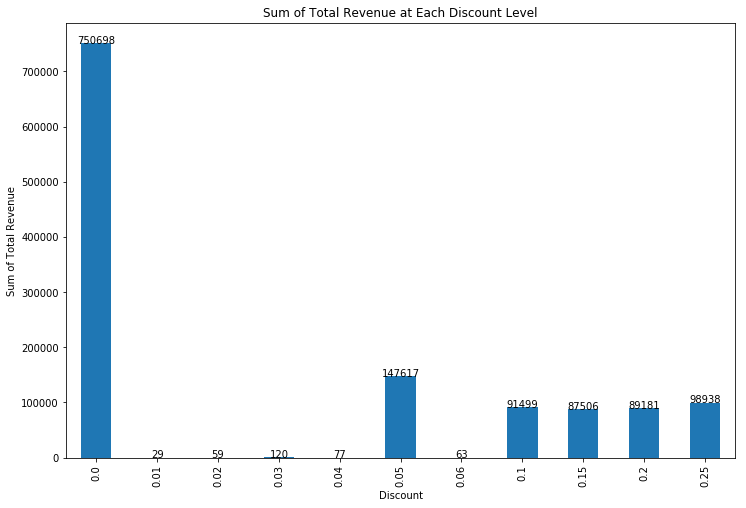

Total sum of revenue: 1265793.0395

Percentage of Total Revenue Sum at Each Discount Level
------------------------------------------------------------
Discount
0.00    0.593066
0.01    0.000023
0.02    0.000047
0.03    0.000096
0.04    0.000061
0.05    0.116620
0.06    0.000050
0.10    0.072286
0.15    0.069132
0.20    0.070455
0.25    0.078163
Name: TotalRevenue, dtype: float64


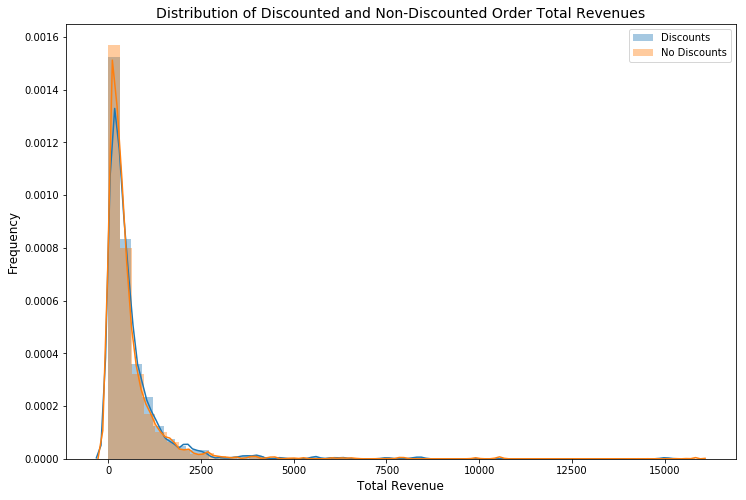

In [102]:
# statistics for discount and non-discount rows
print('No Discounts- descriptive statistics:')
display(orderdetail_nodiscounts_df.describe()[['Discount', 'TotalRevenue']])
print('Discounts - descriptive statistics:')
display(orderdetail_discounts_df.describe()[['Discount', 'TotalRevenue']])

#plots

# sum of total revenue by discount
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
orderdetail_df.groupby('Discount').TotalRevenue.sum().plot.bar()
plt.title('Sum of Total Revenue at Each Discount Level')
plt.xlabel('Discount')
plt.ylabel('Sum of Total Revenue')
for i, v in enumerate(orderdetail_df.groupby('Discount').TotalRevenue.sum()):
    ax.text(i, v+40, "%d" %v, ha="center");
plt.show();

# distributions
print('Total sum of revenue:', orderdetail_df.TotalRevenue.sum())
print('\nPercentage of Total Revenue Sum at Each Discount Level')
print('-'*60)
print(orderdetail_df.groupby('Discount').TotalRevenue.sum() / orderdetail_df.TotalRevenue.sum())

f = plt.figure(figsize=(12, 8))
sns.distplot(orderdetail_discounts_df.TotalRevenue, label='Discounts')
sns.distplot(orderdetail_nodiscounts_df.TotalRevenue, label='No Discounts')
plt.title('Distribution of Discounted and Non-Discounted Order Total Revenues', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Total Revenue', fontsize=12)
plt.legend()
plt.show();

For **Total Revenue**, the non-discount mean is 570 and the discount mean is 614. The non-discount standard deviation is 961 and the discount standard deviation is 981.

The bar chart informs us that transactions without discounts account for 59% of the total sum of revenue that has been received. The 5% discount is the discount level with the greatest revenue received at 12%. The 10%, 15%, 20%, and 25% discount levels each account for about 7% of total revenue.

The distribution plot provide some interesting information about the orders within the dataset. Discount and non-discount total revenue distributions appear very similar, visually. The kernel density estimate indicates that the discount distribution has a nearly identical mean but less of a sharp peak than the non-discount distribution.

Our next challenge will be to investigate whether this difference is statistically significant. First, however, let's determine if our groups meet the normality assumption of our tests.

In [103]:
# KS normality tests
print('KS Tests')
print('-'*70)
print('[ No Discounts ]:', stats.kstest(orderdetail_nodiscounts_df.TotalRevenue, 'norm'), ' - n =', len(orderdetail_nodiscounts_df.TotalRevenue))
print('[ All Discounts ]:', stats.kstest(orderdetail_discounts_df.TotalRevenue, 'norm'), ' - n =', len(orderdetail_discounts_df.TotalRevenue))
print('')
for i in sorted(discount_dict.keys()):
    print('[', i, 'Discount ]:', stats.kstest(discount_dict[i].TotalRevenue, 'norm'), ' - n =', len(discount_dict[i].TotalRevenue))

KS Tests
----------------------------------------------------------------------
[ No Discounts ]: KstestResult(statistic=0.999999206671848, pvalue=0.0)  - n = 1317
[ All Discounts ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 838

[ 0.01 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 1
[ 0.02 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 2
[ 0.03 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 3
[ 0.04 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 1
[ 0.05 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 185
[ 0.06 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 1
[ 0.1 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 173
[ 0.15 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 157
[ 0.2 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 161
[ 0.25 Discount ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 154


None of the **Total Revenue** groups are normally distributed. Despite this, let's next compute the test statistic for each group.

In [104]:
# Welch's t-Test for each discount
print('t-Tests')
print('-'*70)
print('[ All Discounts ]:', stats.ttest_ind(orderdetail_discounts_df.TotalRevenue, orderdetail_nodiscounts_df.TotalRevenue, equal_var=False));
print('')
for i in sorted(discount_dict.keys()):
    print('[', i, 'Discount ]:', stats.ttest_ind(discount_dict[i].TotalRevenue, orderdetail_nodiscounts_df.TotalRevenue, equal_var=False));

t-Tests
----------------------------------------------------------------------
[ All Discounts ]: Ttest_indResult(statistic=1.0381255545690475, pvalue=0.2993546075168257)

[ 0.01 Discount ]: Ttest_indResult(statistic=nan, pvalue=nan)
[ 0.02 Discount ]: Ttest_indResult(statistic=-19.97925036355278, pvalue=1.2926858378608765e-63)
[ 0.03 Discount ]: Ttest_indResult(statistic=-18.074831856605893, pvalue=1.6413462570428332e-25)
[ 0.04 Discount ]: Ttest_indResult(statistic=nan, pvalue=nan)
[ 0.05 Discount ]: Ttest_indResult(statistic=2.0913780231378394, pvalue=0.037709870639518736)
[ 0.06 Discount ]: Ttest_indResult(statistic=nan, pvalue=nan)
[ 0.1 Discount ]: Ttest_indResult(statistic=-0.7985572842232317, pvalue=0.4251528332676521)
[ 0.15 Discount ]: Ttest_indResult(statistic=-0.23711428362146267, pvalue=0.8127469012101085)
[ 0.2 Discount ]: Ttest_indResult(statistic=-0.19725929833636272, pvalue=0.8438253153501999)
[ 0.25 Discount ]: Ttest_indResult(statistic=0.859880240014702, pvalue=0.390

C:\Users\IBM\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\IBM\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\IBM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IBM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IBM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The test statistic's p-value is above the alpha threshold of 0.05, causing us to fail to reject the null hypothesis of equal popuation means for the following discounts:

- All Discounts
- 25%
- 20%
- 15%
- 10%

For these discount levels, there is no difference in the total revenue from orders with that discount and orders without discounts. 

The test statistic's p-value is below the alpha threshold of 0.05, causing us to reject the null hypothesis of equal popuation means for the following discounts:

- 5%
- 3%
- 2%

For these discount levels, there is a difference in the total revenue from orders with that discount and orders without discounts. The sample sizes of the 2% and 3% discount levels are, however, low. This decreases our confidence in the merit of their results.

There is not enough data for the 1%, 4%, and 6% discounts to assess whether a difference in total revenue exists. 

Let's validate our conclusion by looking at results for ANOVA. Before we do that, ANOVA assumes homogeneity of variances. Let's see if that is the case here.

In [105]:
# Levene test 
print('Levene Test')
print('-'*70)
stats.levene(discount_dict[0.01].TotalRevenue, discount_dict[0.02].TotalRevenue, discount_dict[0.03].TotalRevenue,
             discount_dict[0.04].TotalRevenue, discount_dict[0.05].TotalRevenue, discount_dict[0.06].TotalRevenue, 
             discount_dict[0.1].TotalRevenue, discount_dict[0.15].TotalRevenue, discount_dict[0.2].TotalRevenue,
             discount_dict[0.25].TotalRevenue)

Levene Test
----------------------------------------------------------------------


LeveneResult(statistic=1.0234261583013282, pvalue=0.41914547814717185)

The null hypothesis of the Levene Test is that the samples are from populations that have equal variances. The p-value is not significant (p = 0.4) and we fail to reject the null hypothesis. We conclude that discount levels have equal variances for quantity.

Let's look at the ANOVA results and the second assumption that residuals are normally distributed.

In [106]:
# ANOVA
print('ANOVA table')
print('-'*60)
formula = 'TotalRevenue ~ C(Discount)'
model = ols(formula, orderdetail_df).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

# Shapiro-Wilk test
print('\nShapiro-Wilk Test')
print('-'*40)
print(stats.shapiro(model.resid))

ANOVA table
------------------------------------------------------------
                   sum_sq      df         F    PR(>F)
C(Discount)  1.234373e+07    10.0  1.315935  0.215754
Residual     2.011114e+09  2144.0       NaN       NaN

Shapiro-Wilk Test
----------------------------------------
(0.47953104972839355, 0.0)


The p-value obtained from the ANOVA analysis is not significant (p = 0.22), and therefore, we conclude that there are no significant differences among Discount levels on Total Revenue.

The assumption that residuals are drawn from a normal distribution, however, does not appear to apply here. The p-value is significant (p = 0) causing us to reject the null hypothesis of residual normality.

Since ANOVA does not tell us which treatments are significantly different from each other, let's use the multiple pariwise comparison Tukey HSD test to find the pairs of significantly different discount levels.

In [107]:
# Tukey HSD test
m_comp = pairwise_tukeyhsd(endog=orderdetail_df.TotalRevenue, groups=orderdetail_df.Discount, alpha=0.05)
df = pd.DataFrame(m_comp.summary())
headers = df.iloc[0]
m_comp_df  = pd.DataFrame(df.values[1:], columns=headers)
print('Tukey HSD test')
print('-'*50)
m_comp_df[:10]

Tukey HSD test
--------------------------------------------------


,group1,group2,meandiff,lower,upper,reject
0,0.0,0.01,-540.3065,-3662.2549,2581.6418,False
1,0.0,0.02,-540.1165,-2748.5047,1668.2716,False
2,0.0,0.03,-529.703,-2333.5278,1274.1217,False
3,0.0,0.04,-492.2465,-3614.1949,2629.7018,False
4,0.0,0.05,227.9252,-17.1036,472.954,False
5,0.0,0.06,-506.0865,-3628.0349,2615.8618,False
6,0.0,0.1,-41.1098,-293.48,211.2604,False
7,0.0,0.15,-12.6424,-276.1341,250.8493,False
8,0.0,0.2,-16.0866,-276.6374,244.4641,False
9,0.0,0.25,72.4517,-193.3232,338.2266,False


The Tukey HSD test results suggest that there are no discount levels with means statistically different from the no discount mean. The Tukey HSD results differ from Welch's t-Test for the 2%, 3%, and 5% discounts levels.

Our next task is to inspect the magnitude of the effect for the 3 discount level-no discount pairs identified by the t-Test. 

In [108]:
# Cohen's d for each discount
print('Cohen d Measurement')
print('-'*25)
d = {}
d[0.02] = cohen_d(discount_dict[0.02].TotalRevenue, orderdetail_nodiscounts_df.TotalRevenue)
d[0.03] = cohen_d(discount_dict[0.03].TotalRevenue, orderdetail_nodiscounts_df.TotalRevenue)
d[0.05] = cohen_d(discount_dict[0.05].TotalRevenue, orderdetail_nodiscounts_df.TotalRevenue)
print('[ 0.02 Discount ]:', d[0.02])
print('[ 0.03 Discount ]:', d[0.03])
print('[ 0.05 Discount ]:', d[0.05])

Cohen d Measurement
-------------------------
[ 0.02 Discount ]: -0.5620300924440608
[ 0.03 Discount ]: -0.5514031180288775
[ 0.05 Discount ]: 0.220914265900463


A value of -0.50 represents a medium negative effect size for the 2% and 3% discount levels. The 10% discount value of 0.20 is a small positive effect size. The negative discount levels here are of insufficient size to trust these conclusions.

Let's next compute the statistical power associated with these sample sizes, effect sizes, and significance level.

In [109]:
# statistical power calculation
ttp = TTP()
print('Statistical Power')
print('-'*15)
for i in d:
    print('[', i, 'Discount ]', ttp.solve_power(effect_size=d[i], nobs1=len(discount_dict[i].TotalRevenue), alpha=0.05))

Statistical Power
---------------
[ 0.02 Discount ] 0.0645170306872756
[ 0.03 Discount ] 0.08270131765273339
[ 0.05 Discount ] 0.5632569053311889


The *5%* discount level has a moderate power value able to detect effects if they are present. The *2%* and *3%* discount levesl have a low ability to detect effects.

### Conclusion for Hypothesis 2:

- The *5%*, *3%*, and *2%* discount levels have a statistically significant effect on the total revenue of orders in one of our two statistical tests (Welch's t-Test).
- The *6%*, *4%*, and *1%* discount levels do not possess enough data to make a claim one way or the other. The remaining disocunt levels do not show test results with statistically significant effects on total revenue.
- The difference in the total revenue of a product in orders with discounts and orders without discounts has a small magnitude  effect (d = 0.2) on increasing total revenue for the *5%* discount level; and, potentially a medium effect (d = -0.5) on decreasing total revenue for the *3%* and *2%* discount levels. This last claim, however, should be vetted by the application of more data. 
- The power level of the *5%* discount level indicates a moderate probability of tests being able to detect an effect that is present. The power level of the *3%* and *2%* discount levels indicate a very low ability to detect an effect.

### Answer 2: Discount amount has  a statistically significant effect on increasing the total revenue in an order for the 5% discount level.

This finishes our work on Question 2. Let's move on to Question 3.

[ToC](#Table-of-Contents:)

## 4.3 Question 3:

### Does product category have a statistically significant effect on the total revenue in an order? 
### If so, at what levels?

### Hypothesis 3:

- **H0**: There is no difference in the total revenue for orders in a specific category and all orders.
- **H1**: there is a difference in the total revenue for orders in a specific category and all orders.
- **Test Type**: Two-tailed, because we want to determine if there is or is not a difference, regardless of direction.
- **Alpha Level**: 0.05.
- **Control Group**: Merged *Category, Product, and Order Detail* records.
- **Treatment Group**: Merged *Category, Product, and Order Detail* records for each category.
- **Statistical Tests**: 
    - *Welch's Unequal Variances t-Test*. This is a two-sample test used to test the hypothesis that two populations have equal means. It is more reliable than similar tests in situations where the two samples have unequal variances or unequal sample sizes. It should be noted that this test assumes normality in the two populations.
    - *Analysis of Variance (ANOVA)*. This test compares the means of 2 or more groups by analyzing  group variances. ANOVA does not describe which treatments are significantly different from each other. A post-hoc comparison is required to determine this information. It should be noted that this test assumes residuals are normally distributed and variances are homogeneous.
    - *Tukey Honestly Significant Difference (HSD) Test*. This multiple pairwise comparison analysis can inform if pairs of treatments are significantly different treatments.
    
Let's start to answer this question by merging together the pieces of the dataset we need.

In [110]:
# merge the category, product, and order detail tables
merge_product_orderdetail_df = pd.merge(product_df, orderdetail_df, left_on="Id", right_on="ProductId", how="left")
merge_catprodord_df = pd.merge(category_df, merge_product_orderdetail_df, left_on="Id", right_on="CategoryId", how="left")
print('Table shapes')
print('-'*15)
print('product:', product_df.shape)
print('order detail:', orderdetail_df.shape)
print('category:', category_df.shape)
print('merged category-product-order detail:', merge_catprodord_df.shape)
print('\nSample rows:')
merge_catprodord_df[['CategoryId','CategoryName','TotalRevenue']].head()

Table shapes
---------------
product: (77, 13)
order detail: (2155, 8)
category: (8, 3)
merged category-product-order detail: (2155, 24)

Sample rows:


,CategoryId,CategoryName,TotalRevenue
0,1,Beverages,518.4
1,1,Beverages,259.2
2,1,Beverages,288.0
3,1,Beverages,183.6
4,1,Beverages,172.8


There are 2,155 orders that split into 8 different categories. Let's split our dataframe into these category groups.

In [111]:
# split dataframe into the product categories
cats = merge_catprodord_df.CategoryName.unique()
cat_dict = {}
for c in cats:
    cat_dict[c] = merge_catprodord_df.loc[merge_catprodord_df.CategoryName == c]
sorted(cat_dict.keys())

['Beverages',
 'Condiments',
 'Confections',
 'Dairy Products',
 'Grains/Cereals',
 'Meat/Poultry',
 'Produce',
 'Seafood']

Our 8 categories are now stored as dataframes within a greater dictionary. Let's describe the variables we're interested in next.

Descriptive statistics:


TotalRevenue                                                \
                      count        mean          std      min         25%   
CategoryName                                                                
Beverages             404.0  663.040050  1685.811331  13.5000  108.000000   
Condiments            216.0  490.958727   462.281963  17.0000  195.000000   
Confections           334.0  501.069536   618.259773   7.3000  139.875000   
Dairy Products        366.0  640.730287   691.701096   8.5000  190.500000   
Grains/Cereals        196.0  488.492793   531.827940  14.0000  126.000000   
Meat/Poultry          173.0  942.325777  1296.746872  17.8800  196.800000   
Produce               136.0  735.180735   768.655001  22.5525  217.040625   
Seafood               330.0  397.762841   426.114617   4.8000  115.800000   

                                           
                    50%      75%      max  
CategoryName                               
Beverages       251.550   504.00  15810.0  
Condiments      340.625   604.00   2565.0  
Confections     321.000   589.25   5268.0  
Dairy Products  436.350   858.75   6050.0  
Grains/Cereals  374.300   665.00   4322.5  
Meat/Poultry    472.000  1170.00   9903.2  
Produce         511.300  1060.00   6042.0  
Seafood         287.100   501.65   3125.0

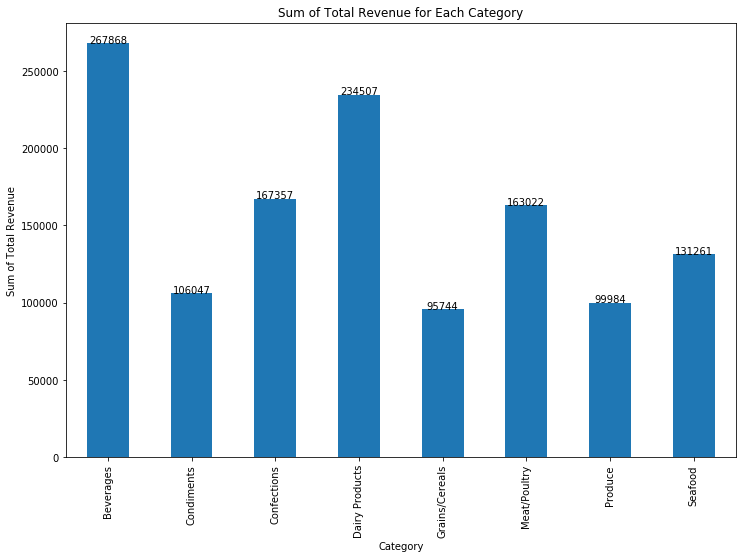

Total sum of revenue: 1265793.0395

Percentage of total revenue sum for each category:
CategoryName
Beverages         0.211621
Condiments        0.083779
Confections       0.132215
Dairy Products    0.185265
Grains/Cereals    0.075640
Meat/Poultry      0.128791
Produce           0.078990
Seafood           0.103699
Name: TotalRevenue, dtype: float64


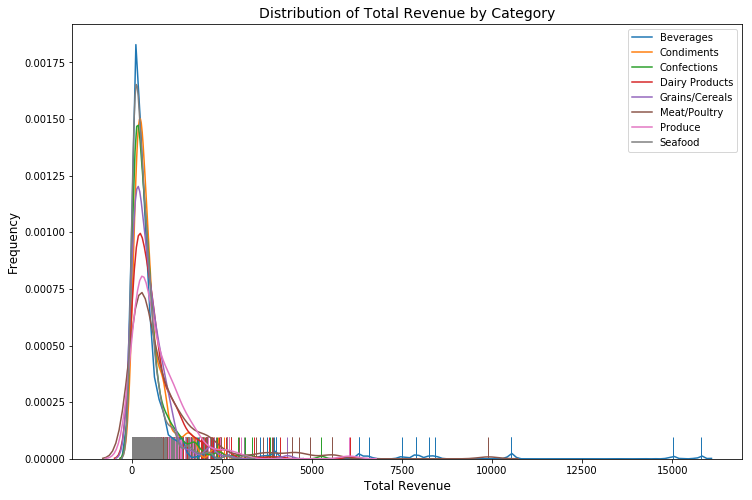

In [112]:
# statistics for rows by category
print('Descriptive statistics:')
display(merge_catprodord_df.groupby('CategoryName').describe()[['TotalRevenue']])

#plots

# sum of total revenue by category
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
merge_catprodord_df.groupby('CategoryName').TotalRevenue.sum().plot.bar()
plt.title('Sum of Total Revenue for Each Category')
plt.xlabel('Category')
plt.ylabel('Sum of Total Revenue')
for i, v in enumerate(merge_catprodord_df.groupby('CategoryName').TotalRevenue.sum()):
    ax.text(i, v+40, "%d" %v, ha="center");
plt.show();

# distributions
print('Total sum of revenue:', merge_catprodord_df.TotalRevenue.sum())
print('\nPercentage of total revenue sum for each category:')
print(merge_catprodord_df.groupby('CategoryName').TotalRevenue.sum() / merge_catprodord_df.TotalRevenue.sum())

f = plt.figure(figsize=(12, 8))
for c in cats:
    sns.distplot(merge_catprodord_df[merge_catprodord_df.CategoryName == c].TotalRevenue, hist=False, rug=True, label=c)
plt.title('Distribution of Total Revenue by Category', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Total Revenue', fontsize=12)
plt.legend()
plt.show();

For Total Revenue, the Beverage category mean is highest at 404 and the Produce category is lowest at 136. The Meat/Poultry category has the highest standard deviation at 942 and the Seafood category has the lowest standard deviation at 397.

The bar chart informs us that transactions with the beverages category account for 21% of the total sum of revenue that has been received. The Dairy Products category is next at 18% of revenue received. The Grains/Cereal category is accounts for the least revenue received at 7.5%.

The distribution plot provide some interesting information about the orders within the dataset. Category total revenue distributions appear to have similar means but widely different variations and frequencies. The kernel density estimate indicates that the Beverage category has the sharpest, highest peaked distribution. On the opposite end is Produce category with a lower, wider curve. 

Our next challenge will be to investigate whether this difference is statistically significant. First, however, let's determine if our groups meet the normality assumption of our tests.

In [113]:
# KS normality tests
print('KS Tests')
print('-'*70)
print('[ All Categories ]:', stats.kstest(merge_catprodord_df.TotalRevenue, 'norm'), ' - n =', len(merge_catprodord_df.TotalRevenue))
print('')
for i in sorted(cat_dict.keys()):
    print('[', i, 'Category ]:', stats.kstest(cat_dict[i].TotalRevenue, 'norm'), ' - n =', len(cat_dict[i].TotalRevenue))

KS Tests
----------------------------------------------------------------------
[ All Categories ]: KstestResult(statistic=0.999999206671848, pvalue=0.0)  - n = 2155

[ Beverages Category ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 404
[ Condiments Category ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 216
[ Confections Category ]: KstestResult(statistic=0.9999999999998561, pvalue=0.0)  - n = 334
[ Dairy Products Category ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 366
[ Grains/Cereals Category ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 196
[ Meat/Poultry Category ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 173
[ Produce Category ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 136
[ Seafood Category ]: KstestResult(statistic=0.999999206671848, pvalue=0.0)  - n = 330


None of the **Total Revenue** groups are normally distributed. Despite this, let's next compute the test statistic for each group.

In [114]:
# Welch's t-Test for each category
print('t-Tests')
print('-'*70)
for i in sorted(cat_dict.keys()):
    print('[', i, 'Category ]:', stats.ttest_ind(cat_dict[i].TotalRevenue, merge_catprodord_df.TotalRevenue, equal_var=False));

t-Tests
----------------------------------------------------------------------
[ Beverages Category ]: Ttest_indResult(statistic=0.8754304095815261, pvalue=0.38180249879091177)
[ Condiments Category ]: Ttest_indResult(statistic=-2.553870670746245, pvalue=0.010991089820260518)
[ Confections Category ]: Ttest_indResult(statistic=-2.17100059351102, pvalue=0.030309127689600215)
[ Dairy Products Category ]: Ttest_indResult(statistic=1.2779376237637516, pvalue=0.20173690501274558)
[ Grains/Cereals Category ]: Ttest_indResult(statistic=-2.281165699156611, pvalue=0.023179528780446306)
[ Meat/Poultry Category ]: Ttest_indResult(statistic=3.5221641841308204, pvalue=0.0005374001748455719)
[ Produce Category ]: Ttest_indResult(statistic=2.137793762651854, pvalue=0.03402088542145878)
[ Seafood Category ]: Ttest_indResult(statistic=-6.038058519193305, pvalue=2.2233924364791357e-09)


The test statistic's p-value is above the alpha significance level of 0.05, causing us to fail to reject the null hypothesis of equal popuation means for the following categories:

- Beverages
- Dairy Products

For these categories, there is no difference in the total revenue from orders with that specific category and all orders.

The test statistic's p-value is below the alpha threshold of 0.05, causing us to reject the null hypothesis of equal popuation means for the following categories:

- Condiments
- Confections
- Grains/Cereals
- Meat/Poultry
- Produce
- Seafood

For these categories, there is a difference in the total revenue from orders with that category and all orders.

Let's validate our conclusion by looking at results for ANOVA. Before we do that, ANOVA assumes homogeneity of variances. Let's see if that is the case here.

In [115]:
# Levene test 
print('Levene Test')
print('-'*70)
stats.levene(cat_dict['Beverages'].TotalRevenue, cat_dict['Condiments'].TotalRevenue, cat_dict['Confections'].TotalRevenue,
             cat_dict['Dairy Products'].TotalRevenue, cat_dict['Grains/Cereals'].TotalRevenue, 
             cat_dict['Meat/Poultry'].TotalRevenue, cat_dict['Produce'].TotalRevenue, cat_dict['Seafood'].TotalRevenue)

Levene Test
----------------------------------------------------------------------


LeveneResult(statistic=6.797438168299644, pvalue=5.295880990914624e-08)

The null hypothesis of the Levene Test is that the samples are from populations that have equal variances. The p-value is significant (p = 5e-08) and we reject the null hypothesis. We conclude that categories do not have equal variances for total revenue.

Despite this, let's look at the ANOVA results and the second assumption that residuals are normally distributed.

In [116]:
# ANOVA
print('ANOVA table')
print('-'*60)
formula = 'TotalRevenue ~ C(CategoryName)'
model = ols(formula, merge_catprodord_df).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

# Shapiro-Wilk test
print('\nShapiro-Wilk Test')
print('-'*40)
print(stats.shapiro(model.resid))

ANOVA table
------------------------------------------------------------
                       sum_sq      df         F        PR(>F)
C(CategoryName)  4.639896e+07     7.0  7.198177  1.536802e-08
Residual         1.977059e+09  2147.0       NaN           NaN

Shapiro-Wilk Test
----------------------------------------
(0.5036502480506897, 0.0)


The p-value obtained from the ANOVA analysis is significant (p = 2e-08), and therefore, we conclude that there are significant differences among Categories on Total Revenue.

The assumption that residuals are drawn from a normal distribution, however, does not appear to apply here. The p-value is significant (p = 0) causing us to reject the null hypothesis of residual normality.

Since ANOVA does not tell us which treatments are significantly different from each other, let's use the multiple pairwise comparison Tukey HSD test to find the pairs of significantly different categories.

In [117]:
# Tukey HSD test
m_comp = pairwise_tukeyhsd(endog=merge_catprodord_df.TotalRevenue, groups=merge_catprodord_df.CategoryName, alpha=0.05)
df = pd.DataFrame(m_comp.summary())
headers = df.iloc[0]
m_comp_df  = pd.DataFrame(df.values[1:], columns=headers)
print('Tukey HSD test')
print('-'*50)
m_comp_df

Tukey HSD test
--------------------------------------------------


,group1,group2,meandiff,lower,upper,reject
0,Beverages,Condiments,-172.0813,-417.4777,73.315,False
1,Beverages,Confections,-161.9705,-377.2755,53.3345,False
2,Beverages,Dairy Products,-22.3098,-232.3991,187.7796,False
3,Beverages,Grains/Cereals,-174.5473,-427.9707,78.8762,False
4,Beverages,Meat/Poultry,279.2857,14.7624,543.8091,True
5,Beverages,Produce,72.1407,-216.4794,360.7608,False
6,Beverages,Seafood,-265.2772,-481.2954,-49.2591,True
7,Condiments,Confections,10.1108,-244.0866,264.3082,False
8,Condiments,Dairy Products,149.7716,-100.0235,399.5667,False
9,Condiments,Grains/Cereals,-2.4659,-289.6653,284.7335,False


The Tukey HSD test results suggest that there are category pairs with means that are statistically different. These pairs include:

- Beverages - Meat/Poultry
- Beverages - Seafood
- Condiments - Meat/Poultry
- Confections - Meat/Poultry
- Dairy Products - Meat/Poultry
- Dairy Products - Seafood
- Grains/Cereals - Meat/Poultry
- Meat/Poultry - Seafood
- Produce - Seafood

Our next task is to inspect the magnitude of the effect for the categories identified by the Welch's t-Test.

In [118]:
# Cohen's d for each category
print('Cohen d Measurement')
print('-'*25)
d = {}
d['Condiments'] = cohen_d(cat_dict['Condiments'].TotalRevenue, merge_catprodord_df.TotalRevenue)
d['Confections'] = cohen_d(cat_dict['Confections'].TotalRevenue, merge_catprodord_df.TotalRevenue)
d['Grains/Cereals'] = cohen_d(cat_dict['Grains/Cereals'].TotalRevenue, merge_catprodord_df.TotalRevenue)
d['Meat/Poultry'] = cohen_d(cat_dict['Meat/Poultry'].TotalRevenue, merge_catprodord_df.TotalRevenue)
d['Produce'] = cohen_d(cat_dict['Produce'].TotalRevenue, merge_catprodord_df.TotalRevenue)
d['Seafood'] = cohen_d(cat_dict['Seafood'].TotalRevenue, merge_catprodord_df.TotalRevenue)
print('[ Condiments Category ]:', d['Condiments'])
print('[ Confections Category ]:', d['Confections'])
print('[ Grains/Cereals Category ]:', d['Grains/Cereals'])
print('[ Meat/Poultry Category ]:', d['Meat/Poultry'])
print('[ Produce Category ]:', d['Produce'])
print('[ Seafood Category ]:', d['Seafood'])

Cohen d Measurement
-------------------------
[ Condiments Category ]: -0.1031596788416992
[ Confections Category ]: -0.09280715164719847
[ Grains/Cereals Category ]: -0.1051169504562964
[ Meat/Poultry Category ]: 0.3559711294821229
[ Produce Category ]: 0.1541955778566979
[ Seafood Category ]: -0.2070090806681836


A value of -0.1 represents a very small negative effect size. A value of 0.15 represents a small positive effect size. The category with a value of 0.4 has a small-to-moderate effect size.

Let's next compute the statistical power associated with the sample sizes, effect sizes, and significance level.

In [119]:
# statistical power calculation
ttp = TTP()
print('Statistical Power')
print('-'*15)
for i in d:
    print('[', i, 'Category ]', ttp.solve_power(effect_size=d[i], nobs1=len(cat_dict[i].TotalRevenue), alpha=0.05))

Statistical Power
---------------
[ Condiments Category ] 0.18787921011986614
[ Confections Category ] 0.2237179528199772
[ Grains/Cereals Category ] 0.1796438003091221
[ Meat/Poultry Category ] 0.9101212940295527
[ Produce Category ] 0.24479437703529483
[ Seafood Category ] 0.7565472960751765


The Meat/Poultry category has a high power value that is able to detect effects if they are present. The Seafood category has a moderate power value that is somewhat able to detect effects. The remaining categories have small power values that are not as capable of detecting effects that are present.

### Conclusion for Hypothesis 3:
- The Condiments, Confections, Grains/Cereals, Meat/Poultry, Produce, and Seafood categories have statistically significant effect on the total revenue of orders in the Welch's t-Test, when compared to all orders.
- The ANOVA test identifies many category pairs with statistically significant differences in total revenue mean in the hundreds of dollars.
- The difference in the total revenue in orders from a specific category and all orders has a small-to-moderate magnitude effect (d = 0.4) on increasing total revenue for the Meat/Poultry category; a small magnitude effect (d = 0.15) on increasing total revenue for the Produce category; and, a small effect (d = -0.1) on decreasing total revenue for the Condiments, Confections, Grains/Cereals, and Seafood categories.
- The power level of the Meat/Poultry category indicates a high probability of tests being able to detect an effect that is present. The ability to detect effects sizes for the other categories tested is much less certain.

### Answer 3: Product category has a statistically significant effect on decreasing the total revenue in an order for the Condiments, Confections, Grains/Cereals, and Seafood categories; and, on increasing the total revenue in an order for the Meat/Poultry and Produce categories. 

This finishes our work on Question 3. Let's move on to Question 4.

[ToC](#Table-of-Contents:)

## 4.4 Question 4:

### Does ship region have a statistically significant effect on the total revenue in an order? 
### If so, at what levels?

### Hypothesis 4:

- **H0**: There is no difference in the total revenue from orders from different ship regions and all orders.
- **H1**: there is a difference in the total revenue from orders from difference ship regions and all orders.
- **Test Type**: Two-tailed, because we want to determine if there is or is not a difference, regardless of direction.
- **Alpha Level**: 0.05.
- **Control Group**: Merged *Category-Product-Order-Order Detail* records.
- **Treatment Group**: Merged *Category-Product-Order-Order Detail* records for each ship region.
- **Statistical Tests**:
    - *Welch's Unequal Variances t-Test*. This is a two-sample test used to test the hypothesis that two populations have equal means. It is more reliable than similar tests in situations where the two samples have unequal variances or unequal sample sizes. It should be noted that this test assumes normality in the two populations.
    - *Analysis of Variance (ANOVA)*. This test compares the means of 2 or more groups by analyzing  group variances. ANOVA does not describe which treatments are significantly different from each other. A post-hoc comparison is required to determine this information. It should be noted that this test assumes residuals are normally distributed and variances are homogeneous.
    - *Tukey Honestly Significant Difference (HSD) Test*. This multiple pairwise comparison analysis can inform if pairs of treatments are significantly different treatments.
    
Let's start to answer this question by merging together the pieces of the dataset we need.

In [120]:
# merge the order table with the combined category-product-order detail table above
merge_catprodord2_df = pd.merge(merge_catprodord_df, order_df, left_on="OrderId", right_on="Id", how="left")
print('Table shapes')
print('-'*15)
print('order:', order_df.shape)
print('merged category-product-order:', merge_catprodord_df.shape)
print('merged category-product-orderdetail-order:', merge_catprodord2_df.shape)
print('\nSample rows:')
merge_catprodord2_df[['ShipRegion','TotalRevenue']].head()

Table shapes
---------------
order: (830, 14)
merged category-product-order: (2155, 24)
merged category-product-orderdetail-order: (2155, 38)

Sample rows:


,ShipRegion,TotalRevenue
0,Western Europe,518.4
1,North America,259.2
2,North America,288.0
3,Western Europe,183.6
4,Central America,172.8


The data needed to find an answer to this question has been combined above. Next, let's split it by the variable we're interested in, **ShipRegion**.

In [121]:
# split the dataset by ship region
regions = merge_catprodord2_df.ShipRegion.unique()
region_dict = {}
for r in regions:
    region_dict[r] = merge_catprodord2_df.loc[merge_catprodord2_df.ShipRegion == r]
sorted(region_dict.keys())

['British Isles',
 'Central America',
 'Eastern Europe',
 'North America',
 'Northern Europe',
 'Scandinavia',
 'South America',
 'Southern Europe',
 'Western Europe']

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
ShipRegion,,,,,,,,
British Isles,190.0,573.427447,944.869689,4.80,144.7200,354.500,660.0000,9903.2
Central America,72.0,327.528854,494.806540,17.00,73.3750,216.600,404.5125,3952.5
Eastern Europe,16.0,220.746875,163.075679,22.35,107.5000,190.000,249.3750,591.6
North America,427.0,692.695317,1092.962510,14.00,147.9000,379.950,775.7375,10540.0
Northern Europe,143.0,609.483654,1073.633574,14.40,182.4375,300.000,606.0000,10540.0
Scandinavia,70.0,350.645750,353.425343,17.88,126.0000,259.875,445.5000,2108.0
South America,355.0,484.100015,972.747268,8.64,140.0000,291.750,538.7500,15810.0
Southern Europe,137.0,330.114726,387.244233,7.30,84.0000,207.000,443.7000,2475.8
Western Europe,745.0,678.072897,1014.433713,8.50,182.4000,405.000,800.0000,15019.5


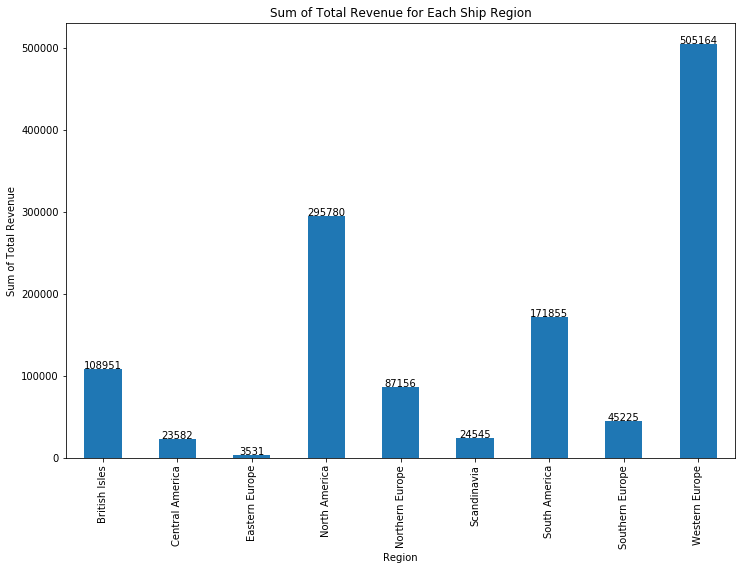

Total sum of revenue: 1265793.0395

Percentage of Total Revenue Sum for Each Ship Region
-------------------------------------------------------
ShipRegion
British Isles      0.086073
Central America    0.018630
Eastern Europe     0.002790
North America      0.233672
Northern Europe    0.068855
Scandinavia        0.019391
South America      0.135769
Southern Europe    0.035729
Western Europe     0.399089
Name: TotalRevenue, dtype: float64


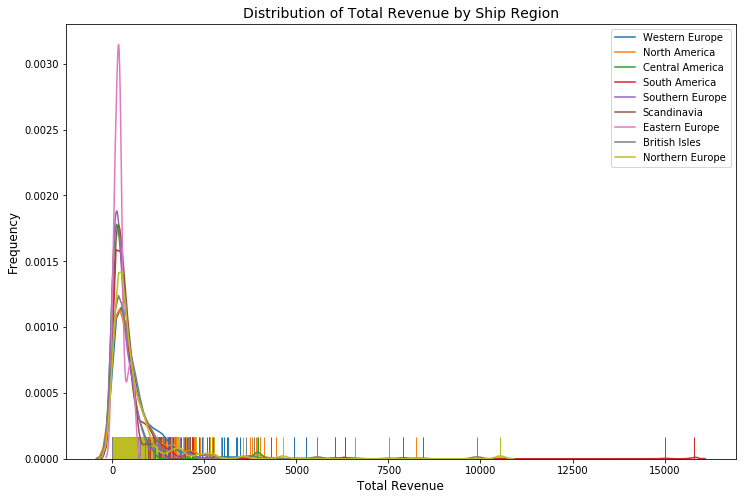

In [122]:
# statistics for rows by ship region
print('Descriptive statistics:')
display(merge_catprodord2_df.groupby('ShipRegion')['TotalRevenue'].describe())

#plots

# sum of total revenue by ship region
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
merge_catprodord2_df.groupby('ShipRegion').TotalRevenue.sum().plot.bar()
plt.title('Sum of Total Revenue for Each Ship Region')
plt.xlabel('Region')
plt.ylabel('Sum of Total Revenue')
for i, v in enumerate(merge_catprodord2_df.groupby('ShipRegion').TotalRevenue.sum()):
    ax.text(i, v+40, "%d" %v, ha="center");
plt.show();

# distributions
print('Total sum of revenue:', merge_catprodord2_df.TotalRevenue.sum())
print('\nPercentage of Total Revenue Sum for Each Ship Region')
print('-'*55)
print(merge_catprodord2_df.groupby('ShipRegion').TotalRevenue.sum() / merge_catprodord2_df.TotalRevenue.sum())

f = plt.figure(figsize=(12, 8))
for r in regions:
    sns.distplot(merge_catprodord2_df[merge_catprodord2_df.ShipRegion == r].TotalRevenue, hist=False, rug=True, label=r)
plt.title('Distribution of Total Revenue by Ship Region', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Total Revenue', fontsize=12)
plt.legend()
plt.show();

For Total Revenue, the North America and Western Europe ship region means are highest at above 650.The Eastern Europe ship region is lowest at 220. The North America, North Europe, and Western Europe ship regions have the highest standard deviation at above 1000 and the Eastern Europe ship region has the lowest standard deviation at 160.

The bar chart informs us that transactions with the Western Europe ship region account for 40% of the total sum of revenue that has been received. The North American ship region is next at 23% of revenue received. The Eastern Europe ship region accounts for the least revenue received at 0.3%.

The distribution plot provide some interesting information about the orders within the dataset. Ship region total revenue distributions appear to have similar means but widely different variations and frequencies. The kernel density estimate indicates that the Eastern Europe ship region has the sharpest, highest peaked distribution. On the opposite end is the North America and Western ship regions with lower, wider curves.

Our next challenge will be to investigate whether this difference is statistically significant. First, however, let's determine if our groups meet the normality assumption of our tests.

In [123]:
# KS normality tests
print('KS Tests')
print('-'*70)
print('[ All Regions ]:', stats.kstest(merge_catprodord2_df.TotalRevenue, 'norm'), '- n =', len(merge_catprodord2_df.TotalRevenue))
print('')
for i in sorted(region_dict.keys()):
    print('[', i, 'Region ]:', stats.kstest(region_dict[i].TotalRevenue, 'norm'), ' - n =', len(region_dict[i].TotalRevenue))

KS Tests
----------------------------------------------------------------------
[ All Regions ]: KstestResult(statistic=0.999999206671848, pvalue=0.0) - n = 2155

[ British Isles Region ]: KstestResult(statistic=0.999999206671848, pvalue=0.0)  - n = 190
[ Central America Region ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 72
[ Eastern Europe Region ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 16
[ North America Region ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 427
[ Northern Europe Region ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 143
[ Scandinavia Region ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 70
[ South America Region ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 355
[ Southern Europe Region ]: KstestResult(statistic=0.9999999999998561, pvalue=0.0)  - n = 137
[ Western Europe Region ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 745


None of the **Total Revenue** groups are normally distributed. Despite this, let's next compute the test statistic for each group.

In [124]:
# Welch's t-Test for each region
print('t-Tests')
print('-'*70)
for i in sorted(region_dict.keys()):
    print('[', i, 'Region ]:', stats.ttest_ind(region_dict[i].TotalRevenue, merge_catprodord2_df.TotalRevenue, equal_var=False));

t-Tests
----------------------------------------------------------------------
[ British Isles Region ]: Ttest_indResult(statistic=-0.19464225517974637, pvalue=0.8458482470498203)
[ Central America Region ]: Ttest_indResult(statistic=-4.1952264733620295, pvalue=6.360080379559051e-05)
[ Eastern Europe Region ]: Ttest_indResult(statistic=-8.00425646011008, pvalue=3.2335730642384056e-08)
[ North America Region ]: Ttest_indResult(statistic=1.85215019784102, pvalue=0.06452439083043385)
[ Northern Europe Region ]: Ttest_indResult(statistic=0.23984933796643743, pvalue=0.8107584478565818)
[ Scandinavia Region ]: Ttest_indResult(statistic=-5.023918085290891, pvalue=2.0481528337575177e-06)
[ South America Region ]: Ttest_indResult(statistic=-1.8544625929854985, pvalue=0.06428975558455541)
[ Southern Europe Region ]: Ttest_indResult(statistic=-6.575913987636637, pvalue=2.5886526130142754e-10)
[ Western Europe Region ]: Ttest_indResult(statistic=2.127615547075789, pvalue=0.03356505463612045)


The test statistic's p-value is above the alpha significance level of 0.05, causing us to fail to reject the null hypothesis of equal popuation means for the following ship regions:

- British isles
- North America
- Northern Europe
- South America

For these ship regions, there is no difference in the total revenue from orders with that specific ship region and all orders.

The test statistic's p-value is below the alpha threshold of 0.05, causing us to reject the null hypothesis of equal popuation means for the following ship regions:

- Central America
- Eastern Europe
- Scandinavia
- Southern Europe
- Western Europe

For these ship regions, there is a difference in the total revenue from orders with that specific ship region and all orders.

Let's validate our conclusion by looking at results for ANOVA. Before we do that, ANOVA assumes homogeneity of variances. Let's see if that is the case here.

In [125]:
# Levene test 
print('Levene Test')
print('-'*70)
stats.levene(region_dict['British Isles'].TotalRevenue, region_dict['Central America'].TotalRevenue, 
             region_dict['Eastern Europe'].TotalRevenue, region_dict['North America'].TotalRevenue, 
             region_dict['Northern Europe'].TotalRevenue, region_dict['Scandinavia'].TotalRevenue, 
             region_dict['South America'].TotalRevenue, region_dict['Southern Europe'].TotalRevenue,
             region_dict['Western Europe'].TotalRevenue)

Levene Test
----------------------------------------------------------------------


LeveneResult(statistic=3.447051573100657, pvalue=0.0005935647674199613)

The null hypothesis of the Levene Test is that the samples are from populations that have equal variances. The p-value is significant (p = 0.0) and we reject the null hypothesis. We conclude that ship regions do not have equal variances for total revenue.

Despite this, let's look at the ANOVA results and the second assumption that residuals are normally distributed.

In [126]:
# ANOVA
print('ANOVA table')
print('-'*60)
formula = 'TotalRevenue ~ C(ShipRegion)'
model = ols(formula, merge_catprodord2_df).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

# Shapiro-Wilk test
print('\nShapiro-Wilk Test')
print('-'*40)
print(stats.shapiro(model.resid))

ANOVA table
------------------------------------------------------------
                     sum_sq      df         F   PR(>F)
C(ShipRegion)  3.476009e+07     8.0  4.688692  0.00001
Residual       1.988698e+09  2146.0       NaN      NaN

Shapiro-Wilk Test
----------------------------------------
(0.48593956232070923, 0.0)


The p-value obtained from the ANOVA analysis is significant (p = 0.0), and therefore, we conclude that there are significant differences among Ship Regions on Total Revenue.

The assumption that residuals are drawn from a normal distribution, however, does not appear to apply here. The p-value is significant (p = 0.0) causing us to reject the null hypothesis of residual normality.

Since ANOVA does not tell us which treatments are significantly different from each other, let's use the multiple pairwise comparison Tukey HSD test to find the pairs of significantly different ship regions.

In [127]:
# Tukey HSD test
m_comp = pairwise_tukeyhsd(endog=merge_catprodord2_df.TotalRevenue, groups=merge_catprodord2_df.ShipRegion, alpha=0.05)
df = pd.DataFrame(m_comp.summary())
headers = df.iloc[0]
m_comp_df  = pd.DataFrame(df.values[1:], columns=headers)
print('Tukey HSD test')
print('-'*50)
m_comp_df

Tukey HSD test
--------------------------------------------------


,group1,group2,meandiff,lower,upper,reject
0,British Isles,Central America,-245.8986,-659.5434,167.7462,False
1,British Isles,Eastern Europe,-352.6806,-1130.7472,425.3861,False
2,British Isles,North America,119.2679,-141.3906,379.9263,False
3,British Isles,Northern Europe,36.0562,-294.8442,366.9566,False
4,British Isles,Scandinavia,-222.7817,-640.6898,195.1264,False
5,British Isles,South America,-89.3274,-358.0024,179.3476,False
6,British Isles,Southern Europe,-243.3127,-578.322,91.6965,False
7,British Isles,Western Europe,104.6454,-138.2788,347.5697,False
8,Central America,Eastern Europe,-106.782,-932.8867,719.3227,False
9,Central America,North America,365.1665,-15.6275,745.9604,False


The Tukey HSD test results suggest that there are ship regions pairs with means that are statistically different. These pairs include:

- North America - Southern Europe
- South America - Western Europe
- Southern Europe - Western Europe

Our next task is to inspect the magnitude of the effect for the ship regions identified by the Welch's t-Test.

In [128]:
# Cohen's d for each region
print('Cohen d Measurement')
print('-'*50)
d = {}
d['Central America'] = cohen_d(region_dict['Central America'].TotalRevenue, merge_catprodord2_df.TotalRevenue)
d['Eastern Europe'] = cohen_d(region_dict['Eastern Europe'].TotalRevenue, merge_catprodord2_df.TotalRevenue)
d['Scandinavia'] = cohen_d(region_dict['Scandinavia'].TotalRevenue, merge_catprodord2_df.TotalRevenue)
d['Southern Europe'] = cohen_d(region_dict['Southern Europe'].TotalRevenue, merge_catprodord2_df.TotalRevenue)
d['Western Europe'] = cohen_d(region_dict['Western Europe'].TotalRevenue, merge_catprodord2_df.TotalRevenue)
print('[ Central America Region ]:', d['Central America'])
print('[ Eastern Europe Region ]:', d['Eastern Europe'])
print('[ Scandinavia Region ]:', d['Scandinavia'])
print('[ Southern Europe Region ]:', d['Southern Europe'])
print('[ Western Europe Region ]:', d['Western Europe'])

Cohen d Measurement
--------------------------------------------------
[ Central America Region ]: -0.27131674577560394
[ Eastern Europe Region ]: -0.37954702188677797
[ Scandinavia Region ]: -0.24760049565240996
[ Southern Europe Region ]: -0.27231127923204057
[ Western Europe Region ]: 0.09245178363020146


A value near -0.2 represents a small negative effect size. A value near 0.1 represents a very small positive effect size.

Let's next compute the statistical power associated with the sample sizes, effect sizes, and significance level.

In [129]:
# statistical power calculation
ttp = TTP()
print('Statistical Power')
print('-'*15)
for i in d:
    print('[', i, 'Region ]', ttp.solve_power(effect_size=d[i], nobs1=len(region_dict[i].TotalRevenue), alpha=0.05))

Statistical Power
---------------
[ Central America Region ] 0.36594623006251187
[ Eastern Europe Region ] 0.17999110738530658
[ Scandinavia Region ] 0.3069835681071831
[ Southern Europe Region ] 0.6125165017210692
[ Western Europe Region ] 0.42993449952229085


The Southern Europe ship region has a moderate power value that is somewhat able to detect effects if they are present. The Eastern Europe ship region has a small power value that is not as capable of detecting effects that are present. The remaining ship regions have statistical power values nearly halfway between these two extremes. 

### Conclusion for Hypothesis 4:

- The Central America, Eastern Europe, Scandinavia, Southern Europe, and Western Europe ship regions have statistically significant effect on the total revenue of orders in the Welch's t-Test, when compared to all orders.
- The ANOVA test identifies a few ship regions pairs with statistically significant differences in total revenue mean in the hundreds of dollars.
- The difference in the total revenue in orders from a specific ship region and all orders has a small magnitude effect (d = -0.2) on decreasing total revenue for the Central America, Eastern Europe, Scandinavia, and Southern Europe ship regions; and, a very small magnitude effect (d = 0.1) on increasing total revenue for the Western Europe ship region.
- The power level of the Southern Europe category indicates a moderate probability of tests being able to detect an effect that is present. The ability to detect effects sizes for the other categories tested is much less certain.

### Answer 4:    Ship region has a statistically significant effect on decreasing the total revenue in an order  for the Central America, Eastern Europe, Scandinavia, and Southern Europe regions; and, on increasing the total revenue in an order for Western Europe region.

This finishes our work on Question 4. Let's move on to our last quesiton, Question 5.

[ToC](#Table-of-Contents:)

## 4.5 Question 5:

### Does reorder level have a statistically significant effect on the cost of items in stock? 
### If so, at what levels?

### Hypothesis 5:

- **H0**: There is no difference in the cost of items in stock for products with reorder levels  and products without reorders.
- **H1**: there is a difference in the cost of items in stock for products with reorder levels and products without reorders.
- **Test Type**: Two-tailed, because we want to determine if there is or is not a difference, regardless of direction.
- **Alpha Level**: 0.05.
- **Control Group**: *Product* records without a reorder (level = 0).
- **Treatment Group**: *Product* records for each reorder level.
- **Statistical Tests**:
    - *Welch's Unequal Variances t-Test*. This is a two-sample test used to test the hypothesis that two populations have equal means. It is more reliable than similar tests in situations where the two samples have unequal variances or unequal sample sizes. It should be noted that this test assumes normality in the two populations.
    - *Analysis of Variance (ANOVA)*. This test compares the means of 2 or more groups by analyzing  group variances. ANOVA does not describe which treatments are significantly different from each other. A post-hoc comparison is required to determine this information. It should be noted that this test assumes residuals are normally distributed and variances are homogeneous.
    - *Tukey Honestly Significant Difference (HSD) Test*. This multiple pairwise comparison analysis can inform if pairs of treatments are significantly different treatments.
    
Let's start to answer this question by obtaining the pieces of the dataset we need.

In [130]:
# review product table information
print('product table shape:', product_df.shape)
print('\nSample rows:')
product_df[['UnitPrice','UnitsInStock','CostOfUnitsInStock','ReorderLevel']].head()

product table shape: (77, 13)

Sample rows:


,UnitPrice,UnitsInStock,CostOfUnitsInStock,ReorderLevel
0,18.00,39,702.0,10
1,19.00,17,323.0,25
2,10.00,13,130.0,25
3,22.00,53,1166.0,0
4,21.35,0,0.0,0


Information from the table we're interested in is above. Let's next split it into reorder level groups.

In [131]:
# split the product table intp reorder level dataframes in a dictionary
rlevels = product_df.ReorderLevel.unique()
rlevel_dict = {}
for l in rlevels:
    rlevel_dict[l] = product_df.loc[product_df.ReorderLevel == l]
sorted(rlevel_dict.keys())

[0, 5, 10, 15, 20, 25, 30]

There are 6 reorder levels and 1 level indicating no reorders have been made. The former are our Treatment groups and the latter is our Control group. Let's take a look at information about these groups.

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
ReorderLevel,,,,,,,,
0,24.0,1132.995833,1224.137406,0.00,316.500,729.875,1289.1500,4345.0
5,8.0,607.387500,590.164821,30.00,118.000,417.250,1100.7000,1515.0
10,7.0,631.821429,290.939010,156.45,478.025,702.000,774.1250,1060.0
15,10.0,885.205000,1342.237035,47.50,214.725,388.000,833.2875,4479.5
20,8.0,973.187500,990.858140,0.00,227.000,761.750,1301.5000,2760.0
25,12.0,1015.708333,1128.402666,130.00,281.000,436.000,1272.5625,3220.5
30,8.0,1093.881250,742.622885,225.00,664.125,927.125,1335.7750,2263.2


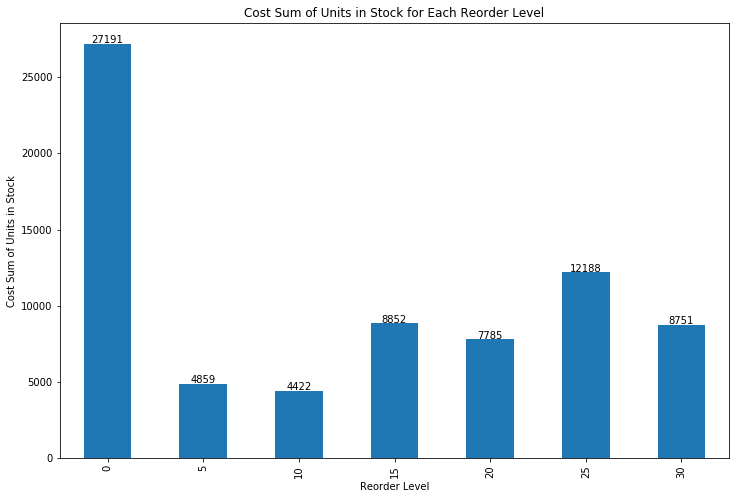

Total cost sum of units in stock: 74050.85

Percentage of Units in Stock Cost Sum for Each Reorder Level
------------------------------------------------------------
ReorderLevel
0     0.367206
5     0.065618
10    0.059726
15    0.119540
20    0.105137
25    0.164596
30    0.118176
Name: CostOfUnitsInStock, dtype: float64


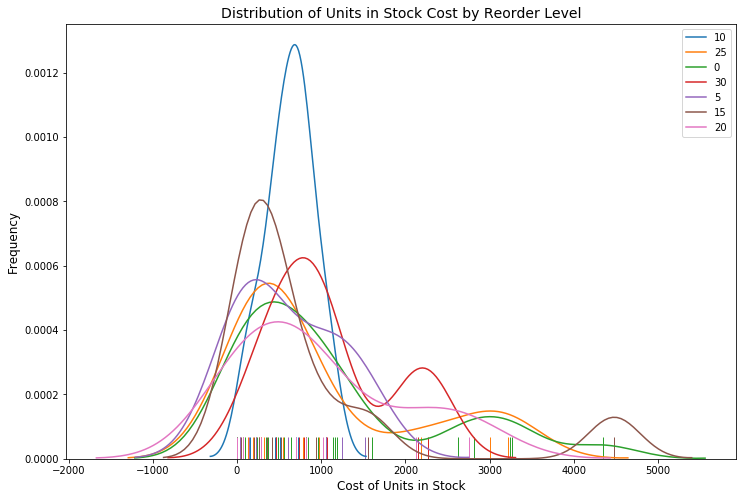

In [132]:
# statistics for rows by reorder level
print('Descriptive statistics:')
display(product_df.groupby('ReorderLevel')['CostOfUnitsInStock'].describe())

#plots

# sum of cost of units in stock by reorder level
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
product_df.groupby('ReorderLevel').CostOfUnitsInStock.sum().plot.bar()
plt.title('Cost Sum of Units in Stock for Each Reorder Level')
plt.xlabel('Reorder Level')
plt.ylabel('Cost Sum of Units in Stock')
for i, v in enumerate(product_df.groupby('ReorderLevel').CostOfUnitsInStock.sum()):
    ax.text(i, v+40, "%d" %v, ha="center");
plt.show();

# distributions
print('Total cost sum of units in stock:', product_df.CostOfUnitsInStock.sum())
print('\nPercentage of Units in Stock Cost Sum for Each Reorder Level')
print('-'*60)
print(product_df.groupby('ReorderLevel').CostOfUnitsInStock.sum() / product_df.CostOfUnitsInStock.sum())

f = plt.figure(figsize=(12, 8))
for l in rlevels:
    sns.distplot(product_df[product_df.ReorderLevel == l].CostOfUnitsInStock, hist=False, rug=True, label=l)
plt.title('Distribution of Units in Stock Cost by Reorder Level', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Cost of Units in Stock', fontsize=12)
plt.legend()
plt.show();

For the Cost of Units in Stock, the control group mean is 1133. The 25 reorder level is just below the 0 level at 1016. The 30 reorder lvel is just above the 0 level at 1094. The 5 reorder level has the lowest mean at 607. The 15 reorder level has the highest standard deviation at above 1342 and the 10 reorder has the lowest standard deviation at 291.

The bar chart informs us that transactions without a reorder level account for 36% of the total cost sum of units in stock. The 15, 20, 25, and 30 reorder levels each account for about 11% of the cost of units in stock. The 5 and 6 reorder levels account for the least cost of units in stock at about 6%.

The distribution plot provide some interesting information about the products within the dataset. Reorder level stock unit cost distributions appear to have varying means, number of peaks and frequencies. The kernel density estimate indicates that the 10 reorder level has the sharpest, highest peaked distribution. On the opposite end is the 30 reorder level with multiple lower, wider peaks.

Our next challenge will be to investigate whether this difference is statistically significant. First, however, let's determine if our groups meet the normality assumption of our tests.

In [133]:
# KS normality tests
print('KS Tests')
print('-'*70)
print('[ All Reorder Levels ]:', stats.kstest(product_df.CostOfUnitsInStock, 'norm'), ' - n =', len(product_df.CostOfUnitsInStock))
print('')
for i in sorted(rlevel_dict.keys()):
    print('[', i, 'Reorder Level ]:', stats.kstest(rlevel_dict[i].CostOfUnitsInStock, 'norm'), ' - n =', len(rlevel_dict[i].CostOfUnitsInStock))

KS Tests
----------------------------------------------------------------------
[ All Reorder Levels ]: KstestResult(statistic=0.935064935064935, pvalue=7.277048387204544e-92)  - n = 77

[ 0 Reorder Level ]: KstestResult(statistic=0.8333333333333334, pvalue=4.906115377843993e-19)  - n = 24
[ 5 Reorder Level ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 8
[ 10 Reorder Level ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 7
[ 15 Reorder Level ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 10
[ 20 Reorder Level ]: KstestResult(statistic=0.875, pvalue=1.1920928955078125e-07)  - n = 8
[ 25 Reorder Level ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 12
[ 30 Reorder Level ]: KstestResult(statistic=1.0, pvalue=0.0)  - n = 8


None of the **Cost of Units in Stock** groups are normally distributed. Despite this, let's next compute the test statistic for each group.

In [134]:
# Welch's t-Test for each reorder level
print('t-Tests')
print('-'*70)
for i in sorted(rlevel_dict.keys())[1:]:
    print('[', i, 'Reorder Level ]:', stats.ttest_ind(rlevel_dict[i].CostOfUnitsInStock, rlevel_dict[0].CostOfUnitsInStock, equal_var=False));

t-Tests
----------------------------------------------------------------------
[ 5 Reorder Level ]: Ttest_indResult(statistic=-1.6145848634171795, pvalue=0.11870432290834666)
[ 10 Reorder Level ]: Ttest_indResult(statistic=-1.835788513562594, pvalue=0.07678775807261386)
[ 15 Reorder Level ]: Ttest_indResult(statistic=-0.5030852572953036, pvalue=0.6219387293592045)
[ 20 Reorder Level ]: Ttest_indResult(statistic=-0.3713832569463958, pvalue=0.7156250851703037)
[ 25 Reorder Level ]: Ttest_indResult(statistic=-0.2856885605797661, pvalue=0.7775872306063034)
[ 30 Reorder Level ]: Ttest_indResult(statistic=-0.10791549695803046, pvalue=0.915119973070629)


The test statistic's p-value is above the alpha significance level of 0.05, causing us to fail to reject the null hypothesis of equal popuation means for the following reorder levels:

- 5
- 10
- 15 
- 20
- 25
- 30

For these reorder levels, there is no difference in the cost of units in stock for products with that specific reorder level and products with no reorders.

The test statistic's p-value is not below the alpha threshold of 0.05, causing us to reject the null hypothesis of equal popuation means, for any reorder levels.

Let's validate our conclusion by looking at results for ANOVA. Before we do that, ANOVA assumes homogeneity of variances. Let's see if that is the case here.

In [135]:
# Levene test 
print('Levene Test')
print('-'*70)
stats.levene(rlevel_dict[0].CostOfUnitsInStock, rlevel_dict[5].CostOfUnitsInStock, rlevel_dict[10].CostOfUnitsInStock, 
             rlevel_dict[15].CostOfUnitsInStock, rlevel_dict[20].CostOfUnitsInStock, rlevel_dict[25].CostOfUnitsInStock, 
            rlevel_dict[30].CostOfUnitsInStock)

Levene Test
----------------------------------------------------------------------


LeveneResult(statistic=0.6602531752071426, pvalue=0.6818117084551734)

The null hypothesis of the Levene Test is that the samples are from populations that have equal variances. The p-value is not significant (p = 0.7) and we reject the null hypothesis. We conclude that ship regions do not have equal variances for total revenue.

Despite this, let's look at the ANOVA results and the second assumption that residuals are normally distributed.

In [136]:
# ANOVA
print('ANOVA table')
print('-'*60)
formula = 'CostOfUnitsInStock ~ C(ReorderLevel)'
model = ols(formula, product_df).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

# Shapiro-Wilk test
print('\nShapiro-Wilk Test')
print('-'*40)
print(stats.shapiro(model.resid))

ANOVA table
------------------------------------------------------------
                       sum_sq    df         F    PR(>F)
C(ReorderLevel)  2.704601e+06   6.0  0.402648  0.874882
Residual         7.836536e+07  70.0       NaN       NaN

Shapiro-Wilk Test
----------------------------------------
(0.8400562405586243, 1.1705232338954374e-07)


The p-value obtained from the ANOVA analysis is not significant (p = 0.9), and therefore, we conclude that there no are significant differences among reorder levels on the Cost of Units in Stock.

The assumption that residuals are drawn from a normal distribution, however, does not appear to apply here. The p-value is significant (p = 1e-07) causing us to reject the null hypothesis of residual normality.

### Conclusion for Hypothesis 5:

- None of the reorder levels (5, 10, 15, 20, 25, 30) have statistically significant effect on the cost of units in stock according to the Welch's t-Test, where each reorder level is compared to the 0 reorders level.
- The ANOVA test validates our conclusion and does not find any difference beteween the stock units cost means of all reorder groups, treatment and control.
### Answer 5: Reorder level  does not have a statistically significant effect on the cost of items in stock.

This finishes our work on Question 5. Let's move on to the conclusion for this project.

[ToC](#Table-of-Contents:)

## 5. Ending Remarks:

### Question 1:
- #### Conclusion:
    - Discount amount has a statistically significant effect on the quantity of a product in an order.
    - The effect is significant at the 5%, 10%, 15%, 20%, and 25% discount levels.
    - For all of these significant discount levels, the effect is an increase on the quantity of product in an order.
    - The increase effect is roughly equal among all of the significant discount levels.
- #### Recommendation:
    - More data should be gathered at the 2%, 3% and 10% discount levels. These levels were not significant for one of the two tests used. 
    - More data also should be gathered at the 1%, 4%, and 6% discount levels. These levels were not significant in either test.
    - If it decided that collecting data is not in the best interest of the company and that quantity of product in an order is the most important metric, then the 1%, 2%, 3%, 4%, 6%, and 10% discount levels should be dropped.

### Question 2:
- #### Conclusion:
    - Discount amount has a statistically significant effect on the total revenue in an order.
    - The effect is significant at the 5% discount level. 
    - For the significant discount level, the effect is an increase of the total revenue received from an order.
    - The increase effect is considered small by the effect size measurement used.
- #### Recommendation:
    - More data should be gathered at the 2%, 3%, and 5% discount levels. These levels were considered significant by one of the two tests used. Specifically, the 2% and 3% discount levels suffer from small sample sizes. 
    - More data also should be gathered at the 1%, 4%, and 6% discount levels. These levels were not significant in either test.
    - If it decided that collecting data is not in the best interest of the company and that total revenue from an order is the most important metric, then the 1%, 2%, 3%, 4%, 6%, 10%, 15%, 20%, and 25% discount levels should be dropped. 

### Question 3:
- #### Conclusion: 
    - Product category has a statistically significant effect on the total revenue in an order.
    - The effect is significant for the Meat/Poultry, Produce, Condiments, Confections, Grains/Cereals, and Seafood categories. 
    - For the Meat/Poultry and Produce categories, the effect is an increase of the total revenue received from an order. 
    - For the Condiments, Confections, Grains/Cereals, and Seafood categories, the effect is a decrease of the total revenue received from an order.
    - The increase effect is considered small-to-moderate for Meat/Poultry and small for Produce.
    - The decrease effect is considered small for all of the decrease effect categories.
- #### Recommendation: 
    - If it is decided that total revenue from an order is the most important metric for the company and that category groups are the units to be removed, then products in the Seafood category should be removed. 
    - The decrease effect for this category from its effect size measurement is twice as much as the decrease seen in other categories.
    - Differences between individual categories have also been assessed. They may be reviewed in the work for this question. There is the possibility of examining inter-category differences in more detail.

### Question 4:
- #### Conclusion:
    - Ship region has a statistically significant effect on the total revenue in an order.
    - The effect is significant for Western Europe, Central Americal, Eastern Europe, Scandinavia, and Southern Europe.
    - For the Western Europe ship region, the effect is an increase of the total revenue received from an order. 
    - For the Central America, Eastern Europe, Scandinavia, and Southern Europe ship regions, the effect is a decrease of the total revenue received froman order.
    - The increase effect is is considered small for Western Europe. 
    - The decrease effect is considered small for all of the decrease effect ship regions.
- #### Recommendation:
    - If it is decided that total revenue from an order is the most important metric for the company and that ship region groups are the units to be removed, then Eastern Europe should no longer be shipped to. 
    - The decrease effect for this category from its effect size mesurement is one-third more than the decrease seen in other ship regions.
    - Differences between individual ship regions have also been assessed. They may be reviewed in the work for this question. There is the possibility of examining inter-category differences in more detail.

### Question 5:
- #### Conclusion:
    - Reorder level does not have a statistically significant effect on the cost of items in stock.
- #### Recommendation:
    - There are no recommendations related to the cost of items in stock due to reorder level. There is the possibility of analyzing this cost with respect to other variables.
    
### Areas of Future Study:
- Questions that could be investigated in future studies to benefit the company:
    - Which employee is the best performing and worst performong on quantity sold and revenue received?
    - How do inventory levels fluctuate with orders made? Are there product stockouts? 
    - What is the relationship between supplier and cost? Should certain suppliers be dropped?
    - What are the major causes of product reorders and products becoming discontinued?
    - Are there effects on products, orders, and shipments at the granular level (Zipcode, City, Country) or macro level (Region, Territory) leading to ineffeciencies?
    - Why is customer demographic information missing?

This project is complete. It has successfully tested the ability to gather information from a real-world database and use knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be of value to the Northwind trading company.
 
 [ToC](#Table-of-Contents:)